 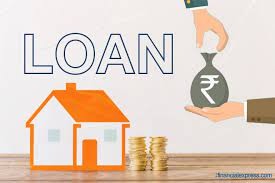

# <div align="center"> CASE STUDY ON LOAN DEFAULTS

<a id="0.1"></a>
## **Table of Contents** 
1.	[Business Understanding and Objective](#1)
2.	[Import libraries](#2)
3.	[Load Dataset](#3)
4.  [Understanding Dataset](#4)
    1. [Findings](#4.1)
5.  [Data Cleaning](#5)
    1. [Checking data types](#5.1)
        1. [Findings](#5.1.1)
    2. [Handling missing values](#5.2)
        1. [Findings](#5.2.1)
    3. [Fixing Columns](#5.3)
        1. [Dropping unwanted columns](#5.3.3)
            1. [Findings](#5.3.3.1)
        2. [Continous data](#5.3.1)
            1. [Findings](#5.3.1.1)
        3. [Categorical data](#5.3.2)
            1. [Findings](#5.3.2.1)
    4. [Outlier Analysis](#5.4)
        1. [Findings](#5.4.1)
6.  [Data analysis](#6)
    1. [Imbalance Ratio](#6.1)
        1. [Findings](#6.1.1)
    2. [Univariate Analysis](#6.2)
        1. [Categorical](#6.2.1)
        2. [Numerical](#6.2.2)
            1. [Findings](#6.2.1.1)
    3. [Bivatiate Analysis](#6.3)
        1. [Nunerical-Numerical](#6.3.1)
        2. [Categorical-Categorical](#6.3.2)
        3. [Numerical-Categorical](#6.3.3)
            1. [Findings](#6.3.1.1)
7. [Merging and Analyzing DataFrames](#7.0)
     1. [Findings](#7.0.1)

### 1. Business Understanding  <a id="1"></a>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a <font color=red>defaulter</font>. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The ***client with payment difficulties***: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved**: The Company has approved loan Application

**Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer**:  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

### Business Objective
[Table of Contents](#0.1)
- Understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

### 2. Importing libraries <a id="2"></a>
[Table of Contents](#0.1)

In [1]:
import warnings
warnings.filterwarnings('ignore')          # ignore warnings 


import numpy as np                         # linear algebra
import pandas as pd                        # data analysis



import matplotlib.pyplot as plt            # for visualizations
import seaborn as sns
sns.set_style("white")
pd.set_option('display.max.columns',130)   # displaying a maximum of 130 columns (we have 122 columns in applications data)
pd.set_option('display.max.rows',300)

### 3. Loading Dataset <a id="3"></a>
[Table of Contents](#0.1)

This dataset has 3 files: 

 

1. `'application_data.csv'`  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 
 
2. `'previous_application.csv'` contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. `'columns_description.csv'` is data dictionary which describes the meaning of the variables.

In [2]:
app = pd.read_csv('application_data.csv')                                      # importng applications data
prev_app = pd.read_csv('previous_application.csv')                             # importing previous applications data
description = pd.read_csv('columns_description.csv',encoding='latin-1')        # improting description

### 4. Understanding Dataset <a id="4"></a>
[Table of Contents](#0.1)



In [3]:
# Shape of data files

print()
print('\'application_data.csv\' file has {0} rows and {1} columns.'.format(app.shape[0],app.shape[1]))
print()
print('\'previous_application.csv\' file has {0} rows and {1} columns.'.format(prev_app.shape[0],prev_app.shape[1]))
print()


'application_data.csv' file has 307511 rows and 122 columns.

'previous_application.csv' file has 1670214 rows and 37 columns.



In [4]:
# printing top 5 rows

app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# printing bottom 5 rows

app.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [6]:
# Getting information on the dataframe

app.info(verbose=True,null_counts=True)                              # verbose = True: to print full summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Statistical summary of Applications DataFrame

app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [9]:
prev_app.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low

In [10]:
prev_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Statistical information of the Previous applications DataFrame

prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [12]:
# checking whether SK_ID_CURR in both dataframes are related or not.

common_id = []

for i in app['SK_ID_CURR']:
    if i in prev_app['SK_ID_CURR']:
        common_id.append(i)
print(len(common_id))

307511


### Findings: <a id="4.1"></a>
[Table of Contents](#0.1)


- Both dataframes have common column `SK_ID_CURR`. All the Id's in Applications DataFrame are from Previous Applications DataFrame Id's
    - We can merge these two dataframes once fixing is done
- `Target variable` is wheather the applicant has payment difficulties
- We can see that there are a lot of null values some of the columns in application dataframe which needs to be addressed
- Age (DAYS_BIRTH),	DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH in `Applications data` are in negative values. Should be converted to positive values. Age is in days, needs to be converted to years.
- Gender of applicant is in 'M','F' format, will be converted to Male and Female for ease of analysis
- There are 47 columns in Applications data about the information of clients' building. Needs to be checked whether the infomation is relavant for our study or not
- There are 20 columns in Applications data whether the client has provided ceratain documentation or not. Needs to be checked.
- Maximum count of children in Applications data is 19. Needs to be checked.


In [13]:
app.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   

   LANDAREA_MODE  

### 5. Data Cleaning <a id="5"></a>

### 5.A Checking data types <a id="5.1"></a>
[Table of Contents](#0.1)

In [14]:
# current applications data
# Converting column in Object datatype to categrical datatype


categorical_col = ['FLAG_MOBIL', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                    'REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
                    'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'WEEKDAY_APPR_PROCESS_START',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'REGION_RATING_CLIENT',
                    'AMT_REQ_CREDIT_BUREAU_QRT','OCCUPATION_TYPE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
                    'HOUR_APPR_PROCESS_START','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'ORGANIZATION_TYPE']
for col in categorical_col:
    app[col] = app[col].astype('category')

In [15]:
# previous applications data

categorical_col_prev_app = []

for col in prev_app:
    if prev_app[col].dtype == 'object':
        categorical_col_prev_app.append(col)

for i in categorical_col_prev_app:
    prev_app[i]=prev_app[i].astype('category')

In [16]:
# current Applications data
# Checking data types


my_dict = {'Column':[],'1st row':[],'dtype':[]}


for col in app.columns:
    my_dict['Column'].append(col)
    my_dict['1st row'].append(app[col][0])
    my_dict['dtype'].append(app[col].dtype)
    
app_dtype = pd.DataFrame(my_dict)

app_dtype

Column                        1st row     dtype
0                      SK_ID_CURR                         100002     int64
1                          TARGET                              1     int64
2              NAME_CONTRACT_TYPE                     Cash loans  category
3                     CODE_GENDER                              M  category
4                    FLAG_OWN_CAR                              N  category
5                 FLAG_OWN_REALTY                              Y  category
6                    CNT_CHILDREN                              0     int64
7                AMT_INCOME_TOTAL                       202500.0   float64
8                      AMT_CREDIT                       406597.5   float64
9                     AMT_ANNUITY                        24700.5   float64
10                AMT_GOODS_PRICE                       351000.0   float64
11                NAME_TYPE_SUITE                  Unaccompanied  category
12               NAME_INCOME_TYPE                        Working  category
13            NAME_EDUCATION_TYPE  Secondary / secondary special  category
14             NAME_FAMILY_STATUS           Single / not married  category
15              NAME_HOUSING_TYPE              House / apartment  category
16     REGION_POPULATION_RELATIVE                       0.018801   float64
17                     DAYS_BIRTH                          -9461     int64
18                  DAYS_EMPLOYED                           -637     int64
19              DAYS_REGISTRATION                        -3648.0   float64
20                DAYS_ID_PUBLISH                          -2120     int64
21                    OWN_CAR_AGE                            NaN   float64
22                     FLAG_MOBIL                              1  category
23                 FLAG_EMP_PHONE                              1     int64
24                FLAG_WORK_PHONE                              0     int64
25               FLAG_CONT_MOBILE                              1     int64
26                     FLAG_PHONE                              1     int64
27                     FLAG_EMAIL                              0     int64
28                OCCUPATION_TYPE                       Laborers  category
29                CNT_FAM_MEMBERS                            1.0   float64
30           REGION_RATING_CLIENT                              2  category
31    REGION_RATING_CLIENT_W_CITY                              2     int64
32     WEEKDAY_APPR_PROCESS_START                      WEDNESDAY  category
33        HOUR_APPR_PROCESS_START                             10  category
34     REG_REGION_NOT_LIVE_REGION                              0     int64
35     REG_REGION_NOT_WORK_REGION                              0     int64
36    LIVE_REGION_NOT_WORK_REGION                              0     int64
37         REG_CITY_NOT_LIVE_CITY                              0  category
38         REG_CITY_NOT_WORK_CITY                              0  category
39        LIVE_CITY_NOT_WORK_CITY                              0  category
40              ORGANIZATION_TYPE         Business Entity Type 3  category
41                   EXT_SOURCE_1                       0.083037   float64
42                   EXT_SOURCE_2                       0.262949   float64
43                   EXT_SOURCE_3                       0.139376   float64
44                 APARTMENTS_AVG                         0.0247   float64
45               BASEMENTAREA_AVG                         0.0369   float64
46    YEARS_BEGINEXPLUATATION_AVG                         0.9722   float64
47                YEARS_BUILD_AVG                         0.6192   float64
48                 COMMONAREA_AVG                         0.0143   float64
49                  ELEVATORS_AVG                            0.0   float64
50                  ENTRANCES_AVG                          0.069   float64
51                  FLOORSMAX_AVG                         0.0833   float64
52                  FLOORSMIN_AVG                   

In [17]:
# Previous Applications data
# Checking data types

my_dict_prev_app = {'Column':[],'1st row':[],'dtype':[]}


for col in prev_app:
    my_dict_prev_app['Column'].append(col)
    my_dict_prev_app['1st row'].append(prev_app[col][0])
    my_dict_prev_app['dtype'].append(prev_app[col].dtype)
    
prev_app_dtype = pd.DataFrame(my_dict_prev_app)

prev_app_dtype

Column                   1st row     dtype
0                    SK_ID_PREV                   2030495     int64
1                    SK_ID_CURR                    271877     int64
2            NAME_CONTRACT_TYPE            Consumer loans  category
3                   AMT_ANNUITY                   1730.43   float64
4               AMT_APPLICATION                   17145.0   float64
5                    AMT_CREDIT                   17145.0   float64
6              AMT_DOWN_PAYMENT                       0.0   float64
7               AMT_GOODS_PRICE                   17145.0   float64
8    WEEKDAY_APPR_PROCESS_START                  SATURDAY  category
9       HOUR_APPR_PROCESS_START                        15     int64
10  FLAG_LAST_APPL_PER_CONTRACT                         Y  category
11       NFLAG_LAST_APPL_IN_DAY                         1     int64
12            RATE_DOWN_PAYMENT                       0.0   float64
13        RATE_INTEREST_PRIMARY                  0.182832   float64
14     RATE_INTEREST_PRIVILEGED                  0.867336   float64
15       NAME_CASH_LOAN_PURPOSE                       XAP  category
16         NAME_CONTRACT_STATUS                  Approved  category
17                DAYS_DECISION                       -73     int64
18            NAME_PAYMENT_TYPE     Cash through the bank  category
19           CODE_REJECT_REASON                       XAP  category
20              NAME_TYPE_SUITE                       NaN  category
21             NAME_CLIENT_TYPE                  Repeater  category
22          NAME_GOODS_CATEGORY                    Mobile  category
23               NAME_PORTFOLIO                       POS  category
24            NAME_PRODUCT_TYPE                       XNA  category
25                 CHANNEL_TYPE              Country-wide  category
26             SELLERPLACE_AREA                        35     int64
27         NAME_SELLER_INDUSTRY              Connectivity  category
28                  CNT_PAYMENT                      12.0   float64
29             NAME_YIELD_GROUP                    middle  category
30          PRODUCT_COMBINATION  POS mobile with interest  category
31           DAYS_FIRST_DRAWING                  365243.0   float64
32               DAYS_FIRST_DUE                     -42.0   float64
33    DAYS_LAST_DUE_1ST_VERSION                     300.0   float64
34                DAYS_LAST_DUE                     -42.0   float64
35             DAYS_TERMINATION                     -37.0   float64
36    NFLAG_INSURED_ON_APPROVAL                       0.0   float64

### Findings: <a ID="5.1.1"></a>
[Table of Contents](#0.1)
- Changed object data type to category type

Renaming some of the columns for ease of Analysis and Visualization: <font color = blue>CODE_GENDER, DAYS_BIRTH, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, NAME_CONTRACT_TYPE</font>

In [18]:
# Renaming columns in current applications

app.rename(columns= {'CODE_GENDER':'GENDER','NAME_INCOME_TYPE':'INCOME_TYPE','NAME_EDUCATION_TYPE':'EDUCATION_TYPE','NAME_FAMILY_STATUS':'FAMILY_STATUS','NAME_HOUSING_TYPE':'HOUSING_TYPE','NAME_CONTRACT_TYPE':'CONTRACT_TYPE'},inplace=True)

In [19]:
app.head()

SK_ID_CURR  TARGET    CONTRACT_TYPE GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1       Cash loans      M            N               Y   
1      100003       0       Cash loans      F            N               N   
2      100004       0  Revolving loans      M            Y               Y   
3      100006       0       Cash loans      F            N               Y   
4      100007       0       Cash loans      M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE    INCOME_TYPE                 EDUCATION_TYPE  \
0   Unaccompanied        Working  Secondary / secondary special   
1          Family  State servant               Higher education   
2   Unaccompanied        Working  Secondary / secondary special   
3   Unaccompanied        Working  Secondary / secondary special   
4   Unaccompanied        Working  Secondary / secondary special   

          FAMILY_STATUS       HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0          1               1                0                 1           1   
1          1               1                0                 1           1   
2          1               1                1                 1           1   
3          1               1                0                 1           0   
4          1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0           0        Laborers              1.0                    2   
1           0      Core staff              2.0                    1   
2           0        Laborers              1.0                    2   
3           0        Laborers              2.0                    2   
4           0      Core staff              1.0                    2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                      10                           0   
1                      11                           0   
2                       9                           0   
3                      17                           0   
4                      11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

### 5.B Handling missing values <a id="5.2"></a>
[Table of Contents](#0.1)

In [20]:
# creating a custom function to return a DataFrame of all the columns and the percentage of null values in each column.

def null_func(df):
    null_dict = {'Column':[],'null %':[]}
    for col in df.columns:
        null_dict['Column'].append(col)
        null_dict['null %'].append(df[col].isnull().sum()*(100/len(df[col])))
    null_df = pd.DataFrame(null_dict)
    null_df = null_df.sort_values('null %',ascending=False,ignore_index=True)
    return null_df

In [21]:
# Null values in current applications data

null_func(app)

Column     null %
0                 COMMONAREA_MEDI  69.872297
1                  COMMONAREA_AVG  69.872297
2                 COMMONAREA_MODE  69.872297
3        NONLIVINGAPARTMENTS_MODE  69.432963
4         NONLIVINGAPARTMENTS_AVG  69.432963
5        NONLIVINGAPARTMENTS_MEDI  69.432963
6              FONDKAPREMONT_MODE  68.386172
7           LIVINGAPARTMENTS_MODE  68.354953
8            LIVINGAPARTMENTS_AVG  68.354953
9           LIVINGAPARTMENTS_MEDI  68.354953
10                  FLOORSMIN_AVG  67.848630
11                 FLOORSMIN_MODE  67.848630
12                 FLOORSMIN_MEDI  67.848630
13               YEARS_BUILD_MEDI  66.497784
14               YEARS_BUILD_MODE  66.497784
15                YEARS_BUILD_AVG  66.497784
16                    OWN_CAR_AGE  65.990810
17                  LANDAREA_MEDI  59.376738
18                  LANDAREA_MODE  59.376738
19                   LANDAREA_AVG  59.376738
20              BASEMENTAREA_MEDI  58.515956
21               BASEMENTAREA_AVG  58.515956
22              BASEMENTAREA_MODE  58.515956
23                   EXT_SOURCE_1  56.381073
24             NONLIVINGAREA_MODE  55.179164
25              NONLIVINGAREA_AVG  55.179164
26             NONLIVINGAREA_MEDI  55.179164
27                 ELEVATORS_MEDI  53.295980
28                  ELEVATORS_AVG  53.295980
29                 ELEVATORS_MODE  53.295980
30             WALLSMATERIAL_MODE  50.840783
31                APARTMENTS_MEDI  50.749729
32                 APARTMENTS_AVG  50.749729
33                APARTMENTS_MODE  50.749729
34                 ENTRANCES_MEDI  50.348768
35                  ENTRANCES_AVG  50.348768
36                 ENTRANCES_MODE  50.348768
37                 LIVINGAREA_AVG  50.193326
38                LIVINGAREA_MODE  50.193326
39                LIVINGAREA_MEDI  50.193326
40                 HOUSETYPE_MODE  50.176091
41                 FLOORSMAX_MODE  49.760822
42                 FLOORSMAX_MEDI  49.760822
43                  FLOORSMAX_AVG  49.760822
44   YEARS_BEGINEXPLUATATION_MODE  48.781019
45   YEARS_BEGINEXPLUATATION_MEDI  48.781019
46    YEARS_BEGINEXPLUATATION_AVG  48.781019
47                 TOTALAREA_MODE  48.268517
48            EMERGENCYSTATE_MODE  47.398304
49                OCCUPATION_TYPE  31.345545
50                   EXT_SOURCE_3  19.825307
51     AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
52      AMT_REQ_CREDIT_BUREAU_DAY  13.501631
53     AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
54      AMT_REQ_CREDIT_BUREAU_MON  13.501631
55      AMT_REQ_CREDIT_BUREAU_QRT  13.501631
56     AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
57                NAME_TYPE_SUITE   0.420148
58       OBS_30_CNT_SOCIAL_CIRCLE   0.332021
59       DEF_30_CNT_SOCIAL_CIRCLE   0.332021
60       OBS_60_CNT_SOCIAL_CIRCLE   0.332021
61       DEF_60_CNT_SOCIAL_CIRCLE   0.332021
62                   EXT_SOURCE_2   0.214626
63                AMT_GOODS_PRICE   0.090403
64                    AMT_ANNUITY   0.003902
65                CNT_FAM_MEMBERS   0.000650
66         DAYS_LAST_PHONE_CHANGE   0.000325
67                   CNT_CHILDREN   0.000000
68                FLAG_DOCUMENT_8   0.000000
69                  CONTRACT_TYPE   0.000000
70                         GENDER   0.000000
71                   FLAG_OWN_CAR   0.000000
72                FLAG_DOCUMENT_2   0.000000
73                FLAG_DOCUMENT_3   0.000000
74                FLAG_DOCUMENT_4   0.000000
75                FLAG_DOCUMENT_5   0.000000
76                FLAG_DOCUMENT_6   0.000000
77                FLAG_DOCUMENT_7   0.000000
78                FLAG_DOCUMENT_9   0.000000
79               FLAG_DOCUMENT_21   0.000000
80               FLAG_DOCUMENT_10   0.000000
81               FLAG_DOCUMENT_11   0.000000
82                FLAG_OWN_REALTY   0.000000
83               FLAG_DOCUMENT_13   0.000000
84               FLAG_DOCUMENT_14   0.000000
85               FLAG_DOCUMENT_15   0.000000
86               FLAG_DOCUMENT_16   0.000000
87               FLAG_DOCUMENT_17   0.000000
88               FLAG_

In [22]:
# Null values in previous applications data

null_func(prev_app)

Column     null %
0      RATE_INTEREST_PRIVILEGED  99.643698
1         RATE_INTEREST_PRIMARY  99.643698
2              AMT_DOWN_PAYMENT  53.636480
3             RATE_DOWN_PAYMENT  53.636480
4               NAME_TYPE_SUITE  49.119754
5     NFLAG_INSURED_ON_APPROVAL  40.298129
6              DAYS_TERMINATION  40.298129
7                 DAYS_LAST_DUE  40.298129
8     DAYS_LAST_DUE_1ST_VERSION  40.298129
9                DAYS_FIRST_DUE  40.298129
10           DAYS_FIRST_DRAWING  40.298129
11              AMT_GOODS_PRICE  23.081773
12                  AMT_ANNUITY  22.286665
13                  CNT_PAYMENT  22.286366
14          PRODUCT_COMBINATION   0.020716
15                   AMT_CREDIT   0.000060
16             NAME_YIELD_GROUP   0.000000
17               NAME_PORTFOLIO   0.000000
18         NAME_SELLER_INDUSTRY   0.000000
19             SELLERPLACE_AREA   0.000000
20                 CHANNEL_TYPE   0.000000
21            NAME_PRODUCT_TYPE   0.000000
22                   SK_ID_PREV   0.000000
23          NAME_GOODS_CATEGORY   0.000000
24             NAME_CLIENT_TYPE   0.000000
25           CODE_REJECT_REASON   0.000000
26                   SK_ID_CURR   0.000000
27                DAYS_DECISION   0.000000
28         NAME_CONTRACT_STATUS   0.000000
29       NAME_CASH_LOAN_PURPOSE   0.000000
30       NFLAG_LAST_APPL_IN_DAY   0.000000
31  FLAG_LAST_APPL_PER_CONTRACT   0.000000
32      HOUR_APPR_PROCESS_START   0.000000
33   WEEKDAY_APPR_PROCESS_START   0.000000
34              AMT_APPLICATION   0.000000
35           NAME_CONTRACT_TYPE   0.000000
36            NAME_PAYMENT_TYPE   0.000000

In [23]:
# Current applications data
# filtering all the columns whose percentage of null values is more than 40% and arranging in descending order

null_df_40 =  null_func(app)[null_func(app)['null %']>40]
null_df_40

Column     null %
0                COMMONAREA_MEDI  69.872297
1                 COMMONAREA_AVG  69.872297
2                COMMONAREA_MODE  69.872297
3       NONLIVINGAPARTMENTS_MODE  69.432963
4        NONLIVINGAPARTMENTS_AVG  69.432963
5       NONLIVINGAPARTMENTS_MEDI  69.432963
6             FONDKAPREMONT_MODE  68.386172
7          LIVINGAPARTMENTS_MODE  68.354953
8           LIVINGAPARTMENTS_AVG  68.354953
9          LIVINGAPARTMENTS_MEDI  68.354953
10                 FLOORSMIN_AVG  67.848630
11                FLOORSMIN_MODE  67.848630
12                FLOORSMIN_MEDI  67.848630
13              YEARS_BUILD_MEDI  66.497784
14              YEARS_BUILD_MODE  66.497784
15               YEARS_BUILD_AVG  66.497784
16                   OWN_CAR_AGE  65.990810
17                 LANDAREA_MEDI  59.376738
18                 LANDAREA_MODE  59.376738
19                  LANDAREA_AVG  59.376738
20             BASEMENTAREA_MEDI  58.515956
21              BASEMENTAREA_AVG  58.515956
22             BASEMENTAREA_MODE  58.515956
23                  EXT_SOURCE_1  56.381073
24            NONLIVINGAREA_MODE  55.179164
25             NONLIVINGAREA_AVG  55.179164
26            NONLIVINGAREA_MEDI  55.179164
27                ELEVATORS_MEDI  53.295980
28                 ELEVATORS_AVG  53.295980
29                ELEVATORS_MODE  53.295980
30            WALLSMATERIAL_MODE  50.840783
31               APARTMENTS_MEDI  50.749729
32                APARTMENTS_AVG  50.749729
33               APARTMENTS_MODE  50.749729
34                ENTRANCES_MEDI  50.348768
35                 ENTRANCES_AVG  50.348768
36                ENTRANCES_MODE  50.348768
37                LIVINGAREA_AVG  50.193326
38               LIVINGAREA_MODE  50.193326
39               LIVINGAREA_MEDI  50.193326
40                HOUSETYPE_MODE  50.176091
41                FLOORSMAX_MODE  49.760822
42                FLOORSMAX_MEDI  49.760822
43                 FLOORSMAX_AVG  49.760822
44  YEARS_BEGINEXPLUATATION_MODE  48.781019
45  YEARS_BEGINEXPLUATATION_MEDI  48.781019
46   YEARS_BEGINEXPLUATATION_AVG  48.781019
47                TOTALAREA_MODE  48.268517
48           EMERGENCYSTATE_MODE  47.398304

In [24]:
# Previous applications data
# filtering all the columns whose percentage of null values is more than 40% and arranging in descending order

null_df_40_prev =  null_func(prev_app)[null_func(prev_app)['null %']>40]
null_df_40_prev

Column     null %
0    RATE_INTEREST_PRIVILEGED  99.643698
1       RATE_INTEREST_PRIMARY  99.643698
2            AMT_DOWN_PAYMENT  53.636480
3           RATE_DOWN_PAYMENT  53.636480
4             NAME_TYPE_SUITE  49.119754
5   NFLAG_INSURED_ON_APPROVAL  40.298129
6            DAYS_TERMINATION  40.298129
7               DAYS_LAST_DUE  40.298129
8   DAYS_LAST_DUE_1ST_VERSION  40.298129
9              DAYS_FIRST_DUE  40.298129
10         DAYS_FIRST_DRAWING  40.298129

In [25]:
# Current applications data
# Dropping columns having more than 40 % null values

app.drop(columns=[i for i in null_df_40.Column],inplace=True)

In [26]:
# Previous applications data
# Dropping columns having more than 40 % null values

prev_app.drop(columns=[i for i in null_df_40_prev.Column],inplace=True)

In [27]:
app.shape

(307511, 73)

In [28]:
prev_app.shape

(1670214, 26)

In [29]:
# Current applications data
# rechecking null value percentage 

null_func(app)

Column     null %
0               OCCUPATION_TYPE  31.345545
1                  EXT_SOURCE_3  19.825307
2    AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
3     AMT_REQ_CREDIT_BUREAU_QRT  13.501631
4     AMT_REQ_CREDIT_BUREAU_MON  13.501631
5    AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
6     AMT_REQ_CREDIT_BUREAU_DAY  13.501631
7    AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
8               NAME_TYPE_SUITE   0.420148
9      OBS_30_CNT_SOCIAL_CIRCLE   0.332021
10     DEF_30_CNT_SOCIAL_CIRCLE   0.332021
11     OBS_60_CNT_SOCIAL_CIRCLE   0.332021
12     DEF_60_CNT_SOCIAL_CIRCLE   0.332021
13                 EXT_SOURCE_2   0.214626
14              AMT_GOODS_PRICE   0.090403
15                  AMT_ANNUITY   0.003902
16              CNT_FAM_MEMBERS   0.000650
17       DAYS_LAST_PHONE_CHANGE   0.000325
18             FLAG_DOCUMENT_17   0.000000
19             FLAG_DOCUMENT_18   0.000000
20             FLAG_DOCUMENT_21   0.000000
21             FLAG_DOCUMENT_20   0.000000
22             FLAG_DOCUMENT_19   0.000000
23              FLAG_DOCUMENT_2   0.000000
24              FLAG_DOCUMENT_3   0.000000
25              FLAG_DOCUMENT_4   0.000000
26              FLAG_DOCUMENT_5   0.000000
27             FLAG_DOCUMENT_16   0.000000
28              FLAG_DOCUMENT_6   0.000000
29              FLAG_DOCUMENT_7   0.000000
30              FLAG_DOCUMENT_8   0.000000
31              FLAG_DOCUMENT_9   0.000000
32             FLAG_DOCUMENT_10   0.000000
33             FLAG_DOCUMENT_11   0.000000
34            ORGANIZATION_TYPE   0.000000
35             FLAG_DOCUMENT_13   0.000000
36             FLAG_DOCUMENT_14   0.000000
37             FLAG_DOCUMENT_15   0.000000
38             FLAG_DOCUMENT_12   0.000000
39                   SK_ID_CURR   0.000000
40      LIVE_CITY_NOT_WORK_CITY   0.000000
41            DAYS_REGISTRATION   0.000000
42                CONTRACT_TYPE   0.000000
43                       GENDER   0.000000
44                 FLAG_OWN_CAR   0.000000
45              FLAG_OWN_REALTY   0.000000
46                 CNT_CHILDREN   0.000000
47             AMT_INCOME_TOTAL   0.000000
48                   AMT_CREDIT   0.000000
49                  INCOME_TYPE   0.000000
50               EDUCATION_TYPE   0.000000
51                FAMILY_STATUS   0.000000
52                 HOUSING_TYPE   0.000000
53   REGION_POPULATION_RELATIVE   0.000000
54                   DAYS_BIRTH   0.000000
55                DAYS_EMPLOYED   0.000000
56              DAYS_ID_PUBLISH   0.000000
57       REG_CITY_NOT_WORK_CITY   0.000000
58                   FLAG_MOBIL   0.000000
59               FLAG_EMP_PHONE   0.000000
60              FLAG_WORK_PHONE   0.000000
61             FLAG_CONT_MOBILE   0.000000
62                   FLAG_PHONE   0.000000
63                   FLAG_EMAIL   0.000000
64         REGION_RATING_CLIENT   0.000000
65  REGION_RATING_CLIENT_W_CITY   0.000000
66   WEEKDAY_APPR_PROCESS_START   0.000000
67      HOUR_APPR_PROCESS_START   0.000000
68   REG_REGION_NOT_LIVE_REGION   0.000000
69   REG_REGION_NOT_WORK_REGION   0.000000
70  LIVE_REGION_NOT_WORK_REGION   0.000000
71                       TARGET   0.000000
72       REG_CITY_NOT_LIVE_CITY   0.000000

In [30]:
# Previous applications data
# rechecking null value percentage 

null_func(prev_app)

Column     null %
0               AMT_GOODS_PRICE  23.081773
1                   AMT_ANNUITY  22.286665
2                   CNT_PAYMENT  22.286366
3           PRODUCT_COMBINATION   0.020716
4                    AMT_CREDIT   0.000060
5            CODE_REJECT_REASON   0.000000
6              NAME_YIELD_GROUP   0.000000
7          NAME_SELLER_INDUSTRY   0.000000
8              SELLERPLACE_AREA   0.000000
9                  CHANNEL_TYPE   0.000000
10            NAME_PRODUCT_TYPE   0.000000
11               NAME_PORTFOLIO   0.000000
12          NAME_GOODS_CATEGORY   0.000000
13             NAME_CLIENT_TYPE   0.000000
14                   SK_ID_PREV   0.000000
15            NAME_PAYMENT_TYPE   0.000000
16                   SK_ID_CURR   0.000000
17         NAME_CONTRACT_STATUS   0.000000
18       NAME_CASH_LOAN_PURPOSE   0.000000
19       NFLAG_LAST_APPL_IN_DAY   0.000000
20  FLAG_LAST_APPL_PER_CONTRACT   0.000000
21      HOUR_APPR_PROCESS_START   0.000000
22   WEEKDAY_APPR_PROCESS_START   0.000000
23              AMT_APPLICATION   0.000000
24           NAME_CONTRACT_TYPE   0.000000
25                DAYS_DECISION   0.000000

In [31]:
# current applications data
# imputing missing values in OCCUPATION_TYPE with mode of the column

app['OCCUPATION_TYPE'].fillna(app['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [32]:
# current applications data
# imputing missing values in EXT_SOURCE_2 with median of the column

app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median(),inplace=True)

In [33]:
# current applications data
# imputing missing values in all columns containing AMT in it with median values

for i in list(null_func(app)['Column']):
    if i in app.columns:
        if 'AMT' in i:
            app[i].fillna(app[i].mode()[0],inplace=True)

In [34]:
# current applications data
# imputing the missing values in all the columns containing CNT_SOCIAL with median values

for i in list(null_func(app)['Column']):
    if i in app.columns:
        if 'CNT_SOCIAL' in i:
            app[i].fillna(app[i].mode()[0],inplace=True)
    

In [35]:
# current applications data
app['NAME_TYPE_SUITE'].fillna(app['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [36]:
# current applications data
# imputing missing values in EXT_SOURCE_2 with median values

app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].median(),inplace=True)

In [37]:
# current applications data
# imputing missing values in CNT_FAM_MEMBERS with mode

app['CNT_FAM_MEMBERS'].fillna(app['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

In [38]:
# current applications data
# imputing missing values in DAYS_LAST_PHONE_CHANGE with mode

app['DAYS_LAST_PHONE_CHANGE'].fillna(app['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

In [39]:
# imputing missing values in previous applications data
for col in prev_app:
    if prev_app[col].dtype in ['int64','float64']:
        prev_app[col].fillna(prev_app[col].median(),inplace=True)
    else:
        prev_app[col].fillna(prev_app[col].mode()[0],inplace=True)

In [40]:
null_func(app)

Column  null %
0                    SK_ID_CURR     0.0
1        REG_CITY_NOT_WORK_CITY     0.0
2               FLAG_DOCUMENT_8     0.0
3               FLAG_DOCUMENT_7     0.0
4               FLAG_DOCUMENT_6     0.0
5               FLAG_DOCUMENT_5     0.0
6               FLAG_DOCUMENT_4     0.0
7               FLAG_DOCUMENT_3     0.0
8               FLAG_DOCUMENT_2     0.0
9        DAYS_LAST_PHONE_CHANGE     0.0
10     DEF_60_CNT_SOCIAL_CIRCLE     0.0
11     OBS_60_CNT_SOCIAL_CIRCLE     0.0
12     DEF_30_CNT_SOCIAL_CIRCLE     0.0
13     OBS_30_CNT_SOCIAL_CIRCLE     0.0
14                 EXT_SOURCE_3     0.0
15                 EXT_SOURCE_2     0.0
16            ORGANIZATION_TYPE     0.0
17              FLAG_DOCUMENT_9     0.0
18             FLAG_DOCUMENT_10     0.0
19             FLAG_DOCUMENT_11     0.0
20             FLAG_DOCUMENT_20     0.0
21    AMT_REQ_CREDIT_BUREAU_QRT     0.0
22    AMT_REQ_CREDIT_BUREAU_MON     0.0
23   AMT_REQ_CREDIT_BUREAU_WEEK     0.0
24    AMT_REQ_CREDIT_BUREAU_DAY     0.0
25   AMT_REQ_CREDIT_BUREAU_HOUR     0.0
26             FLAG_DOCUMENT_21     0.0
27             FLAG_DOCUMENT_19     0.0
28             FLAG_DOCUMENT_12     0.0
29             FLAG_DOCUMENT_18     0.0
30             FLAG_DOCUMENT_17     0.0
31             FLAG_DOCUMENT_16     0.0
32             FLAG_DOCUMENT_15     0.0
33             FLAG_DOCUMENT_14     0.0
34             FLAG_DOCUMENT_13     0.0
35      LIVE_CITY_NOT_WORK_CITY     0.0
36       REG_CITY_NOT_LIVE_CITY     0.0
37                       TARGET     0.0
38  LIVE_REGION_NOT_WORK_REGION     0.0
39   REGION_POPULATION_RELATIVE     0.0
40                 HOUSING_TYPE     0.0
41                FAMILY_STATUS     0.0
42               EDUCATION_TYPE     0.0
43                  INCOME_TYPE     0.0
44              NAME_TYPE_SUITE     0.0
45              AMT_GOODS_PRICE     0.0
46                  AMT_ANNUITY     0.0
47                   AMT_CREDIT     0.0
48             AMT_INCOME_TOTAL     0.0
49                 CNT_CHILDREN     0.0
50              FLAG_OWN_REALTY     0.0
51                 FLAG_OWN_CAR     0.0
52                       GENDER     0.0
53                CONTRACT_TYPE     0.0
54                   DAYS_BIRTH     0.0
55                DAYS_EMPLOYED     0.0
56            DAYS_REGISTRATION     0.0
57              CNT_FAM_MEMBERS     0.0
58   REG_REGION_NOT_WORK_REGION     0.0
59   REG_REGION_NOT_LIVE_REGION     0.0
60      HOUR_APPR_PROCESS_START     0.0
61   WEEKDAY_APPR_PROCESS_START     0.0
62  REGION_RATING_CLIENT_W_CITY     0.0
63         REGION_RATING_CLIENT     0.0
64              OCCUPATION_TYPE     0.0
65              DAYS_ID_PUBLISH     0.0
66                   FLAG_EMAIL     0.0
67                   FLAG_PHONE     0.0
68             FLAG_CONT_MOBILE     0.0
69              FLAG_WORK_PHONE     0.0
70               FLAG_EMP_PHONE     0.0
71                   FLAG_MOBIL     0.0
72   AMT_REQ_CREDIT_BUREAU_YEAR     0.0

In [41]:
null_func(prev_app)

Column  null %
0                    SK_ID_PREV     0.0
1                    SK_ID_CURR     0.0
2              NAME_YIELD_GROUP     0.0
3                   CNT_PAYMENT     0.0
4          NAME_SELLER_INDUSTRY     0.0
5              SELLERPLACE_AREA     0.0
6                  CHANNEL_TYPE     0.0
7             NAME_PRODUCT_TYPE     0.0
8                NAME_PORTFOLIO     0.0
9           NAME_GOODS_CATEGORY     0.0
10             NAME_CLIENT_TYPE     0.0
11           CODE_REJECT_REASON     0.0
12            NAME_PAYMENT_TYPE     0.0
13                DAYS_DECISION     0.0
14         NAME_CONTRACT_STATUS     0.0
15       NAME_CASH_LOAN_PURPOSE     0.0
16       NFLAG_LAST_APPL_IN_DAY     0.0
17  FLAG_LAST_APPL_PER_CONTRACT     0.0
18      HOUR_APPR_PROCESS_START     0.0
19   WEEKDAY_APPR_PROCESS_START     0.0
20              AMT_GOODS_PRICE     0.0
21                   AMT_CREDIT     0.0
22              AMT_APPLICATION     0.0
23                  AMT_ANNUITY     0.0
24           NAME_CONTRACT_TYPE     0.0
25          PRODUCT_COMBINATION     0.0

### Findings <a ID="5.2.1"></a>
[Table of Contents](#0.1)

- From the current applications DataFrame, we can see that 49 columns have null values more than 40%
    - Analyzing these columns will not give any reliable results. Hence, dropping these columns
- Imputed rest of the columns with median for numerical columns and with mode for categorical columns

### 5.C Fixing columns <a id="5.3"></a>
[Table of Contents](#0.1)

### 5.3.1 Dropping unwanted Columns <a ID="5.3.3"></a>

In [42]:
# Current applications data
# Checking all the columns with flags

col_flags = {'Column':[],'flag %':[]}


for col in app.columns:
    if 'FLAG' in col:
        if col not in ('FLAG_OWN_CAR','FLAG_OWN_REALTY'):
            col_flags['Column'].append(col)
            col_flags['flag %'].append(app[col].value_counts()[1]*100/len(app))

col_flags_df = pd.DataFrame(col_flags)
col_flags_df = col_flags_df.sort_values('flag %',ascending=False,ignore_index=True)
col_flags_df

Column     flag %
0         FLAG_MOBIL  99.999675
1   FLAG_CONT_MOBILE  99.813340
2     FLAG_EMP_PHONE  81.988937
3    FLAG_DOCUMENT_3  71.002338
4         FLAG_PHONE  28.106637
5    FLAG_WORK_PHONE  19.936848
6    FLAG_DOCUMENT_6   8.805539
7    FLAG_DOCUMENT_8   8.137595
8         FLAG_EMAIL   5.671992
9    FLAG_DOCUMENT_5   1.511491
10  FLAG_DOCUMENT_16   0.992810
11  FLAG_DOCUMENT_18   0.812979
12  FLAG_DOCUMENT_11   0.391206
13   FLAG_DOCUMENT_9   0.389580
14  FLAG_DOCUMENT_13   0.352508
15  FLAG_DOCUMENT_14   0.293648
16  FLAG_DOCUMENT_15   0.120971
17  FLAG_DOCUMENT_19   0.059510
18  FLAG_DOCUMENT_20   0.050730
19  FLAG_DOCUMENT_21   0.033495
20  FLAG_DOCUMENT_17   0.026666
21   FLAG_DOCUMENT_7   0.019186
22   FLAG_DOCUMENT_4   0.008130
23   FLAG_DOCUMENT_2   0.004227
24  FLAG_DOCUMENT_10   0.002276
25  FLAG_DOCUMENT_12   0.000650

- Huge imbalace observed in the flagged columns. Dropping all except FLAG_DOCUMENT_3, FLAG_MOBIL, FLAG_CONT_MOBILE, FLAG_EMP_PHONE

In [43]:
# Current applications data
# Dropping unwanted flag columns

app.drop(columns=[i for i in col_flags_df.Column if i not in('FLAG_DOCUMENT_3','FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE')],inplace=True)


In [44]:
app.shape

(307511, 51)

In [45]:
# Current applications data
# Checking all the columns with CREDIT_BUREAU inquiries

cred_bur = {'Column':[],'no_inq':[]}

for col in app.columns:
    if 'CREDIT_BUREAU' in col:
        cred_bur['Column'].append(col)
        cred_bur['no_inq'].append((app[col].values == 0).sum() * 100/len(app))
    
cred_bur_df = pd.DataFrame(cred_bur)
cred_bur_df

Column     no_inq
0  AMT_REQ_CREDIT_BUREAU_HOUR  99.471238
1   AMT_REQ_CREDIT_BUREAU_DAY  99.515790
2  AMT_REQ_CREDIT_BUREAU_WEEK  97.224164
3   AMT_REQ_CREDIT_BUREAU_MON  85.769940
4   AMT_REQ_CREDIT_BUREAU_QRT  83.553434
5  AMT_REQ_CREDIT_BUREAU_YEAR  36.850714

- Huge imbalace observed in the columns containing CREDIT_BUREAU. Dropping these columns

In [46]:
app.drop(columns=[i for i in cred_bur_df['Column']],inplace=True)

In [47]:
app.head(2)

SK_ID_CURR  TARGET CONTRACT_TYPE GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1    Cash loans      M            N               Y   
1      100003       0    Cash loans      F            N               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   

  NAME_TYPE_SUITE    INCOME_TYPE                 EDUCATION_TYPE  \
0   Unaccompanied        Working  Secondary / secondary special   
1          Family  State servant               Higher education   

          FAMILY_STATUS       HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120          1   
1      -16765          -1188            -1186.0             -291          1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1                 1        Laborers              1.0   
1               1                 1      Core staff              2.0   

  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                    2                            2   
1                    1                            1   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                      10   
1                     MONDAY                      11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                            0                      0                      0   
1                            0                      0                      0   

  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0                       0  Business Entity Type 3      0.262949      0.139376   
1                       0                  School      0.622246      0.535276   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   

  FLAG_DOCUMENT_3  
0               1  
1               1

In [48]:
# Current applications data
# Checking all the columns containing REGION

region = {'Region':[], 'zero %':[]}

for i in app.columns:
    if 'REGION' in i or 'CITY' in i:
        region['Region'].append(i)
        region['zero %'].append((app[i].values == 0).sum()*100/len(app))

region_df = pd.DataFrame(region)
region_df = region_df.sort_values('zero %',ascending=False,ignore_index=True)
region_df

Region     zero %
0   REG_REGION_NOT_LIVE_REGION  98.485583
1  LIVE_REGION_NOT_WORK_REGION  95.934129
2   REG_REGION_NOT_WORK_REGION  94.923108
3       REG_CITY_NOT_LIVE_CITY  92.182719
4      LIVE_CITY_NOT_WORK_CITY  82.044545
5       REG_CITY_NOT_WORK_CITY  76.954646
6   REGION_POPULATION_RELATIVE   0.000000
7         REGION_RATING_CLIENT   0.000000
8  REGION_RATING_CLIENT_W_CITY   0.000000

- From above we can see that the information provided by the client is same ( 0 means same, 1 mean different). Hence plotting a heatmap to find the correlation among the variables

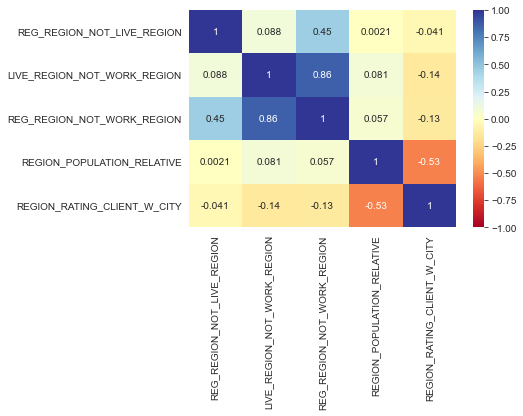

In [49]:
region_corr = app[region_df['Region']].corr()
sns.heatmap(region_corr,cmap='RdYlBu',annot=True,center=0,vmin=-1.0,vmax=1.0)
plt.show()

### Observations for heatmap:
- There is a high positive correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY. We can use one of the two for analysis
- There is a high positive correlation between REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION. We can use one of the two for analysis
- There is a high positive correlation between REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY. We can use one of the two for analysis

In [50]:
# Current applications data
# Dropping unwanted columns with REGION

app.drop(columns=[i for i in region['Region'] if i not in ( 'REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION','LIVE_CITY_NOT_WORK_CITY')],inplace=True)

In [51]:
app.head()

SK_ID_CURR  TARGET    CONTRACT_TYPE GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1       Cash loans      M            N               Y   
1      100003       0       Cash loans      F            N               N   
2      100004       0  Revolving loans      M            Y               Y   
3      100006       0       Cash loans      F            N               Y   
4      100007       0       Cash loans      M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE    INCOME_TYPE                 EDUCATION_TYPE  \
0   Unaccompanied        Working  Secondary / secondary special   
1          Family  State servant               Higher education   
2   Unaccompanied        Working  Secondary / secondary special   
3   Unaccompanied        Working  Secondary / secondary special   
4   Unaccompanied        Working  Secondary / secondary special   

          FAMILY_STATUS       HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL  FLAG_EMP_PHONE  \
0            -3648.0            -2120          1               1   
1            -1186.0             -291          1               1   
2            -4260.0            -2531          1               1   
3            -9833.0            -2437          1               1   
4            -4311.0            -3458          1               1   

   FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                 1        Laborers              1.0                    2   
1                 1      Core staff              2.0                    1   
2                 1        Laborers              1.0                    2   
3                 1        Laborers              2.0                    2   
4                 1      Core staff              1.0                    2   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                      10   
1                     MONDAY                      11   
2                     MONDAY                       9   
3                  WEDNESDAY                      17   
4                   THURSDAY                      11   

   REG_REGION_NOT_LIVE_REGION LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                           0                       0  Business Entity Type 3   
1                           0                       0                  School   
2                           0                       0              Government   
3                           0                       0  Business Entity Type 3   
4                           0                       1                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.535276                       2.0   
4      0.322738      0.535276                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.

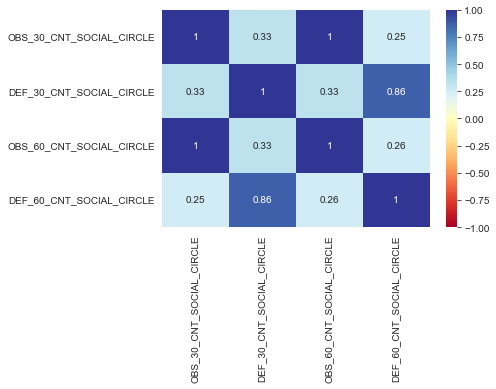

In [52]:
# Current applications data
# Checking correlation among all the columns containing SOCIAL

social = []
for i in app.columns:
    if 'SOCIAL' in i:
        social.append(i)

social_corr = app[social].corr()
sns.heatmap(social_corr,cmap='RdYlBu',center=0,vmin=-1,vmax=1,annot=True)
plt.show()

In [53]:
app[social].columns

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

### Observations for heatmap:
- There is a high positive correlation between OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE. We can use one of the two for analysis
- There is a high positive correlation between DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE. We can use one of the two for analysis


In [54]:
# Current applications data
Dropping unwanted columns with REGION

app.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'],inplace=True)

In [55]:
app.shape

(307511, 37)

In [56]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [57]:
prev_app.drop(columns=['NAME_YIELD_GROUP','SELLERPLACE_AREA','PRODUCT_COMBINATION','CODE_REJECT_REASON'],inplace=True)

### Findings<a ID="5.3.3.1">
 [Table of Contents](#0.1)

- Huge imbalace observed in the flagged columns. Dropping all except FLAG_DOCUMENT_3, FLAG_MOBIL, FLAG_CONT_MOBILE, FLAG_EMP_PHONE
- Huge imbalace observed in the columns containing CREDIT_BUREAU. Dropping all columns containing CREDIT_BUREAU
- Address provided by the client at the time of application is the same as the provided address. Hence plotted a heat map to find the correlation among the variables.
- There is a high positive correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY. We can use one of the two for analysis
- There is a high positive correlation between REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION. We can use one of the two for analysis
- There is a high positive correlation between REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY. We can use one of the two for analysis
- There is a high positive correlation between OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE. We can use one of the two for analysis
- There is a high positive correlation between DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE. We can use one of the two for analysis
- <font color=red>After dropping all the unwanted columns, Applications DataFrame has 37 columns in total</font>


### Data can be divided to two types - Qualitaitve and Quantitative

 ***Quantitative vs Qualitative data*** 
- Interval vs ratio
- Nominal vs ordinal


***Quantitative (continous)***
- Quantitative is a numerical measurement of something 
- Example: Temparature, time, sales, height, weight etc.
> 1. Interval: Cannot have zero. Example: Time of admit, Year of joining, date of order etc.
> 2. Ratio: Can have zero. Example: Profit, discount, rainfall etc.


***Qualitative (Categorical)***
- Qualitative is a quality or a characteristic of something.
- Example: Gender, Sex, Color, Country etc.
> 1. Nominal: Applies to categories, names or labels which cannot be sorted from lowest to highest. Example: Red, Blue, Green.
> 2. Ordinal: Applies to the categories which can be sorted. Example: L,H,L,XL.

### 5.3.2 Continous data <a ID="5.3.1"></a>
[Table of Contents](#0.1)

In [58]:
# Current applications data
# Converting `DAYS_BIRTH` with DAYS into year and positive values

day_cols = []

for i in app.columns:
    if 'DAYS' in i:
        day_cols.append(i)
        
app[day_cols] = app[day_cols].apply(lambda x: abs(x)//365)
app[day_cols]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0               25              1                9.0                5   
1               45              3                3.0                0   
2               52              0               11.0                6   
3               52              8               26.0                6   
4               54              8               11.0                9   
...            ...            ...                ...              ...   
307506          25              0               23.0                5   
307507          56           1000               12.0               11   
307508          41             21               18.0               14   
307509          32             13                7.0                2   
307510          46              3               14.0                1   

        DAYS_LAST_PHONE_CHANGE  
0                          3.0  
1                          2.0  
2                          2.0  
3                          1.0  
4                          3.0  
...                        ...  
307506                     0.0  
307507                     0.0  
307508                     5.0  
307509                     0.0  
307510                     2.0  

[307511 rows x 5 columns]

In [59]:
# Previous applications data
# Converting `DAYS_DECISION` with DAYS into year and positive values

prev_app['DAYS_DECISION'] = prev_app['DAYS_DECISION'].apply(lambda x : abs(x))

In [60]:
# Current applications data
# Renaming Columns

app.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

In [162]:
# Current applications data

continous_columns = []

for col in app.columns:
    if app[col].dtype == 'int64' or app[col].dtype == 'float64':
        continous_columns.append(col)

print()
print('Toal number of continous columns in Applications DataFrame: ',len(continous_columns))
print()
print('*'*80)
print()
print('List of continous columns in Applications DataFrame: ', continous_columns)


Toal number of continous columns in Applications DataFrame:  20

********************************************************************************

List of continous columns in Applications DataFrame:  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE']


In [163]:
# Previous applications data

continous_columns_prev = []

for col in prev_app.columns:
    if prev_app[col].dtype == 'int64' or prev_app[col].dtype == 'float64':
        continous_columns_prev.append(col)

print()
print('Toal number of continous columns in Previous Applications DataFrame: ',len(continous_columns_prev))
print()
print('*'*80)
print()
print('List of continous columns in Previous Applications DataFrame: ', continous_columns_prev)


Toal number of continous columns in Previous Applications DataFrame:  10

********************************************************************************

List of continous columns in Previous Applications DataFrame:  ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'CNT_PAYMENT']



Statistical information for SK_ID_CURR column: 

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

............................................................

Minimum value in SK_ID_CURR column:  100002
Maximum value in SK_ID_CURR column:  456255

............................................................

Percentage of null values for SK_ID_CURR column:  0.0

............................................................



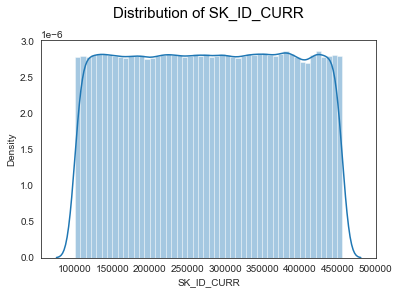


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for TARGET column: 

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

............................................................

Minimum value in TARGET column:  0
Maximum value in TARGET column:  1

............................................................

Percentage of null values for TARGET column:  0.0

............................................................



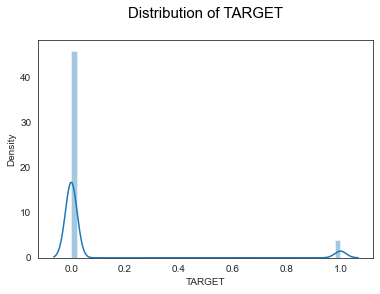


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for CNT_CHILDREN column: 

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

............................................................

Minimum value in CNT_CHILDREN column:  0
Maximum value in CNT_CHILDREN column:  19

............................................................

Percentage of null values for CNT_CHILDREN column:  0.0

............................................................



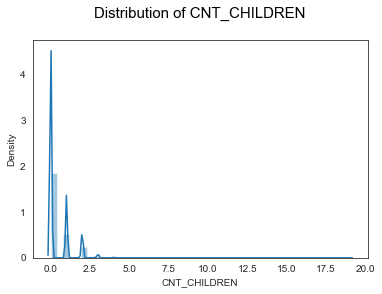


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_INCOME_TOTAL column: 

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

............................................................

Minimum value in AMT_INCOME_TOTAL column:  25650.0
Maximum value in AMT_INCOME_TOTAL column:  117000000.0

............................................................

Percentage of null values for AMT_INCOME_TOTAL column:  0.0

............................................................



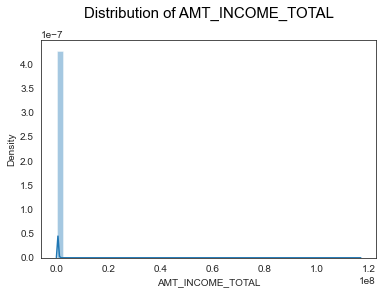


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_CREDIT column: 

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

............................................................

Minimum value in AMT_CREDIT column:  45000.0
Maximum value in AMT_CREDIT column:  4050000.0

............................................................

Percentage of null values for AMT_CREDIT column:  0.0

............................................................



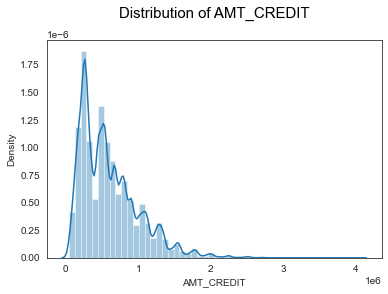


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_ANNUITY column: 

count    307511.000000
mean      27107.867258
std       14493.895950
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

............................................................

Minimum value in AMT_ANNUITY column:  1615.5
Maximum value in AMT_ANNUITY column:  258025.5

............................................................

Percentage of null values for AMT_ANNUITY column:  0.0

............................................................



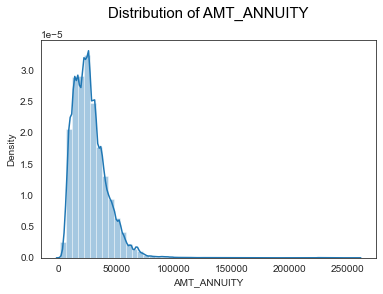


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_GOODS_PRICE column: 

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

............................................................

Minimum value in AMT_GOODS_PRICE column:  40500.0
Maximum value in AMT_GOODS_PRICE column:  4050000.0

............................................................

Percentage of null values for AMT_GOODS_PRICE column:  0.0

............................................................



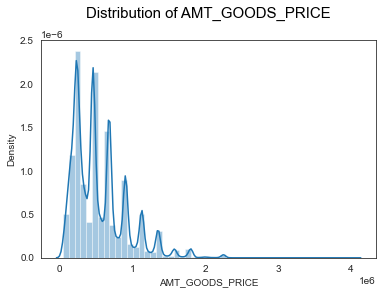


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AGE column: 

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

............................................................

Minimum value in AGE column:  20
Maximum value in AGE column:  69

............................................................

Percentage of null values for AGE column:  0.0

............................................................



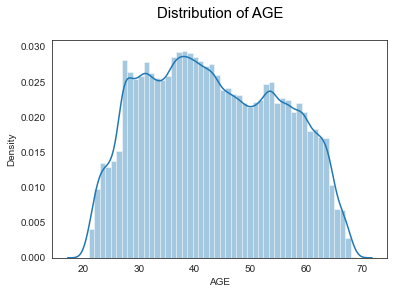


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for YEARS_EMPLOYED column: 

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

............................................................

Minimum value in YEARS_EMPLOYED column:  0
Maximum value in YEARS_EMPLOYED column:  1000

............................................................

Percentage of null values for YEARS_EMPLOYED column:  0.0

............................................................



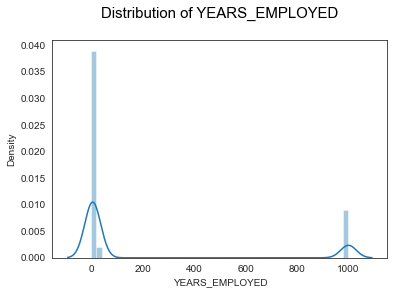


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for YEARS_REGISTRATION column: 

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64

............................................................

Minimum value in YEARS_REGISTRATION column:  0.0
Maximum value in YEARS_REGISTRATION column:  67.0

............................................................

Percentage of null values for YEARS_REGISTRATION column:  0.0

............................................................



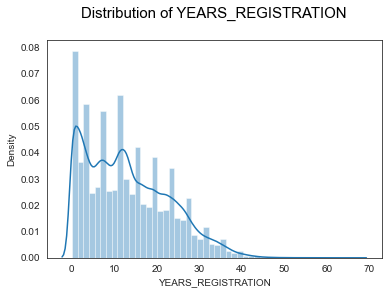


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for YEARS_ID_PUBLISH column: 

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64

............................................................

Minimum value in YEARS_ID_PUBLISH column:  0
Maximum value in YEARS_ID_PUBLISH column:  19

............................................................

Percentage of null values for YEARS_ID_PUBLISH column:  0.0

............................................................



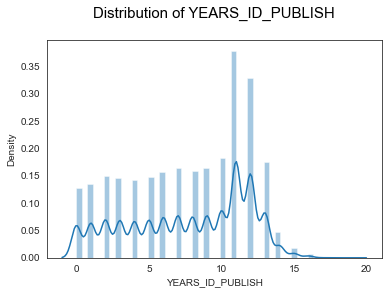


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for FLAG_EMP_PHONE column: 

count    307511.000000
mean          0.819889
std           0.384280
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64

............................................................

Minimum value in FLAG_EMP_PHONE column:  0
Maximum value in FLAG_EMP_PHONE column:  1

............................................................

Percentage of null values for FLAG_EMP_PHONE column:  0.0

............................................................



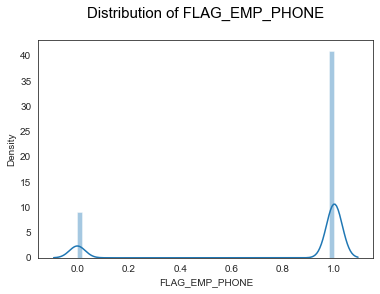


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for FLAG_CONT_MOBILE column: 

count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64

............................................................

Minimum value in FLAG_CONT_MOBILE column:  0
Maximum value in FLAG_CONT_MOBILE column:  1

............................................................

Percentage of null values for FLAG_CONT_MOBILE column:  0.0

............................................................



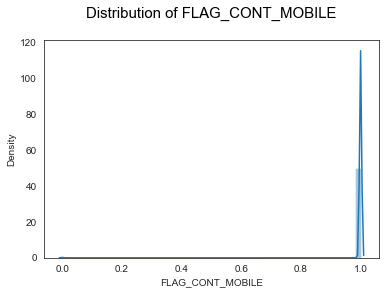


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for CNT_FAM_MEMBERS column: 

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

............................................................

Minimum value in CNT_FAM_MEMBERS column:  1.0
Maximum value in CNT_FAM_MEMBERS column:  20.0

............................................................

Percentage of null values for CNT_FAM_MEMBERS column:  0.0

............................................................



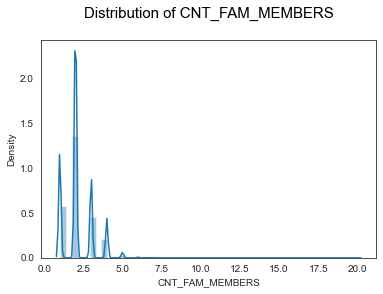


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for REG_REGION_NOT_LIVE_REGION column: 

count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

............................................................

Minimum value in REG_REGION_NOT_LIVE_REGION column:  0
Maximum value in REG_REGION_NOT_LIVE_REGION column:  1

............................................................

Percentage of null values for REG_REGION_NOT_LIVE_REGION column:  0.0

............................................................



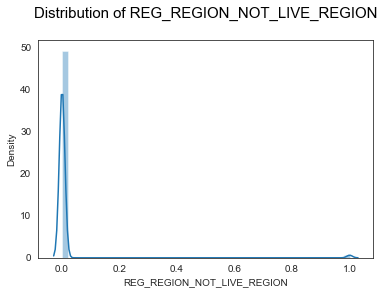


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for EXT_SOURCE_2 column: 

count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

............................................................

Minimum value in EXT_SOURCE_2 column:  8.173616518884397e-08
Maximum value in EXT_SOURCE_2 column:  0.8549996664047012

............................................................

Percentage of null values for EXT_SOURCE_2 column:  0.0

............................................................



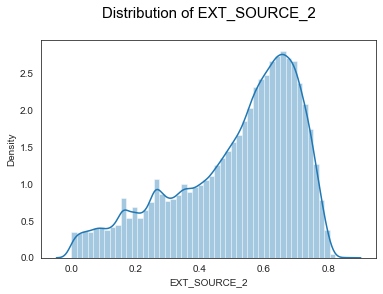


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for EXT_SOURCE_3 column: 

count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

............................................................

Minimum value in EXT_SOURCE_3 column:  0.0005272652387098
Maximum value in EXT_SOURCE_3 column:  0.8960095494948396

............................................................

Percentage of null values for EXT_SOURCE_3 column:  0.0

............................................................



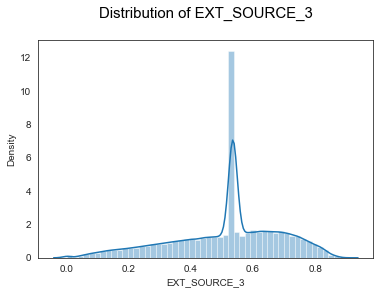


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for OBS_60_CNT_SOCIAL_CIRCLE column: 

count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

............................................................

Minimum value in OBS_60_CNT_SOCIAL_CIRCLE column:  0.0
Maximum value in OBS_60_CNT_SOCIAL_CIRCLE column:  344.0

............................................................

Percentage of null values for OBS_60_CNT_SOCIAL_CIRCLE column:  0.0

............................................................



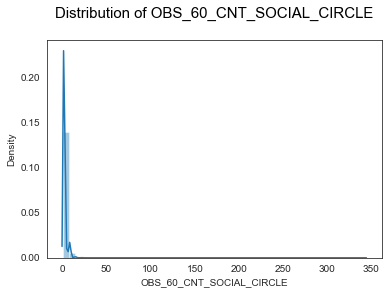


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for DEF_60_CNT_SOCIAL_CIRCLE column: 

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

............................................................

Minimum value in DEF_60_CNT_SOCIAL_CIRCLE column:  0.0
Maximum value in DEF_60_CNT_SOCIAL_CIRCLE column:  24.0

............................................................

Percentage of null values for DEF_60_CNT_SOCIAL_CIRCLE column:  0.0

............................................................



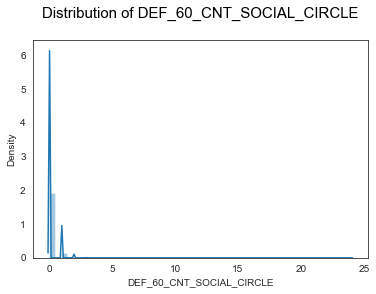


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for YEARS_LAST_PHONE_CHANGE column: 

count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

............................................................

Minimum value in YEARS_LAST_PHONE_CHANGE column:  0.0
Maximum value in YEARS_LAST_PHONE_CHANGE column:  11.0

............................................................

Percentage of null values for YEARS_LAST_PHONE_CHANGE column:  0.0

............................................................



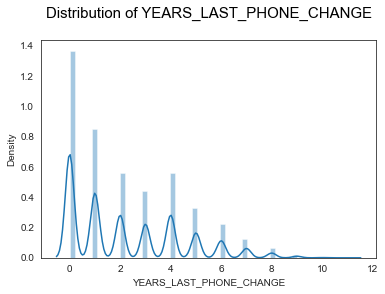


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [166]:
# Current applications data
# Checking information about each of the continous column and checking for outliers

for i in continous_columns:
    print()
    print('Statistical information for {} column: '.format(i))
    print()
    print(app[i].describe())
    print()
    print('.' * 60)
    print()
    print('Minimum value in {} column: '.format(i),app[i].min())
    print('Maximum value in {} column: '.format(i),app[i].max())
    print()
    print('.' * 60)
    print()
    print('Percentage of null values for {} column: '.format(i), app[i].isnull().sum()*100/len(app))
    print()
    print('.' * 60)
    print()
    sns.distplot(app[i])
    plt.title('Distribution of {}\n'.format(i),fontdict={'fontsize':15,'color':'k'})
    plt.show()
    print()
    print('X'*60)


Statistical information for SK_ID_PREV column: 

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64

............................................................

Minimum value in SK_ID_PREV column:  1000001
Maximum value in SK_ID_PREV column:  2845382

............................................................

Percentage of null values for SK_ID_PREV column:  0.0

............................................................



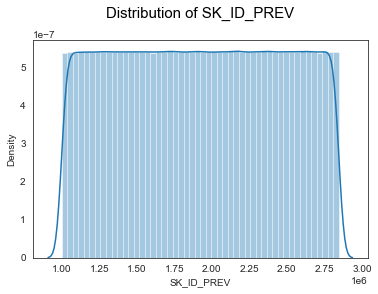


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for SK_ID_CURR column: 

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

............................................................

Minimum value in SK_ID_CURR column:  100001
Maximum value in SK_ID_CURR column:  456255

............................................................

Percentage of null values for SK_ID_CURR column:  0.0

............................................................



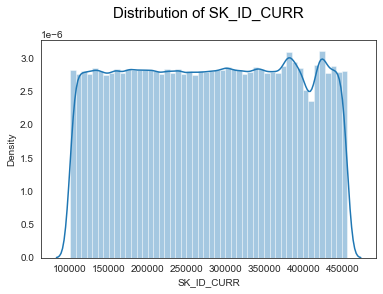


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_ANNUITY column: 

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

............................................................

Minimum value in AMT_ANNUITY column:  0.0
Maximum value in AMT_ANNUITY column:  418058.145

............................................................

Percentage of null values for AMT_ANNUITY column:  0.0

............................................................



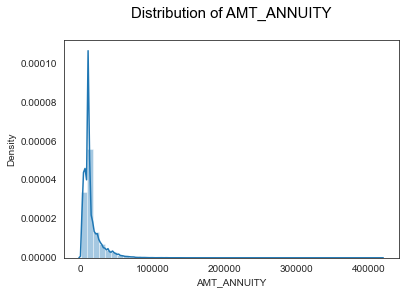


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_APPLICATION column: 

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

............................................................

Minimum value in AMT_APPLICATION column:  0.0
Maximum value in AMT_APPLICATION column:  6905160.0

............................................................

Percentage of null values for AMT_APPLICATION column:  0.0

............................................................



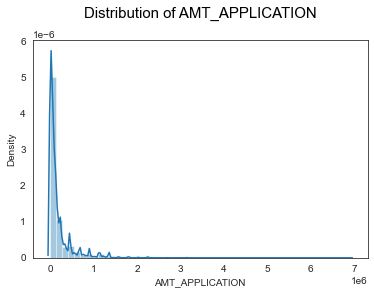


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_CREDIT column: 

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

............................................................

Minimum value in AMT_CREDIT column:  0.0
Maximum value in AMT_CREDIT column:  6905160.0

............................................................

Percentage of null values for AMT_CREDIT column:  0.0

............................................................



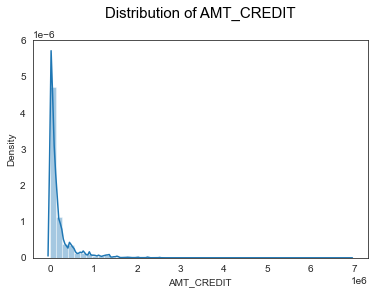


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for AMT_GOODS_PRICE column: 

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

............................................................

Minimum value in AMT_GOODS_PRICE column:  0.0
Maximum value in AMT_GOODS_PRICE column:  6905160.0

............................................................

Percentage of null values for AMT_GOODS_PRICE column:  0.0

............................................................



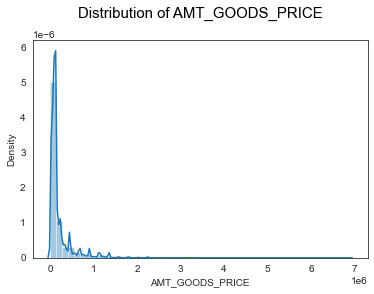


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for HOUR_APPR_PROCESS_START column: 

count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64

............................................................

Minimum value in HOUR_APPR_PROCESS_START column:  0
Maximum value in HOUR_APPR_PROCESS_START column:  23

............................................................

Percentage of null values for HOUR_APPR_PROCESS_START column:  0.0

............................................................



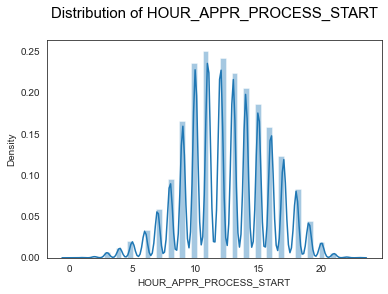


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for NFLAG_LAST_APPL_IN_DAY column: 

count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

............................................................

Minimum value in NFLAG_LAST_APPL_IN_DAY column:  0
Maximum value in NFLAG_LAST_APPL_IN_DAY column:  1

............................................................

Percentage of null values for NFLAG_LAST_APPL_IN_DAY column:  0.0

............................................................



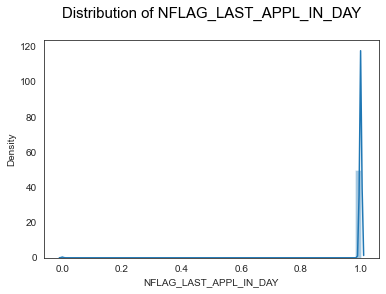


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for DAYS_DECISION column: 

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

............................................................

Minimum value in DAYS_DECISION column:  1
Maximum value in DAYS_DECISION column:  2922

............................................................

Percentage of null values for DAYS_DECISION column:  0.0

............................................................



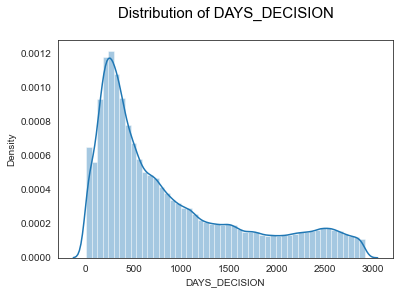


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for CNT_PAYMENT column: 

count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

............................................................

Minimum value in CNT_PAYMENT column:  0.0
Maximum value in CNT_PAYMENT column:  84.0

............................................................

Percentage of null values for CNT_PAYMENT column:  0.0

............................................................



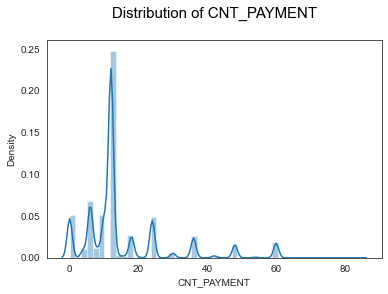


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [167]:
# Previous applications data
# Checking information about each of the continous column and checking for outliers

for i in continous_columns_prev:
    print()
    print('Statistical information for {} column: '.format(i))
    print()
    print(prev_app[i].describe())
    print()
    print('.' * 60)
    print()
    print('Minimum value in {} column: '.format(i),prev_app[i].min())
    print('Maximum value in {} column: '.format(i),prev_app[i].max())
    print()
    print('.' * 60)
    print()
    print('Percentage of null values for {} column: '.format(i), prev_app[i].isnull().sum()*100/len(prev_app))
    print()
    print('.' * 60)
    print()
    sns.distplot(prev_app[i])
    plt.title('Distribution of {}\n'.format(i),fontdict={'fontsize':15,'color':'k'})
    plt.show()
    print()
    print('X'*60)

### Findings <a ID="5.3.1.1"></a>
[Table of Contents](#0.1)

- From the histogram of `TARGET` column, we can say that the dataset is very imbalanced
- Converted the columns containing 'DAYS' having values in days into years
- Renamed DAYS_BIRTH into AGE

### 5.3.3 Categorical data <a ID="5.3.2"></a>
[Table of Contents](#0.1)

In [168]:
# Current Applications data

categorical_columns = []

for col in app.columns:
    if app[col].dtype == 'category':
        categorical_columns.append(col)

print()
print('Toal number of categorical columns in Current Applications DataFrame: ',len(categorical_columns))
print()
print('*'*80)
print()
print('List of categorical columns in Current Applications DataFrame: ', categorical_columns)


Toal number of categorical columns in Current Applications DataFrame:  19

********************************************************************************

List of categorical columns in Current Applications DataFrame:  ['CONTRACT_TYPE', 'GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_STATUS', 'HOUSING_TYPE', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'AGE_GROUP', 'INCOME_RANGE']


In [169]:
# Previous Applications data

categorical_columns_prev = []

for col in prev_app.columns:
    if prev_app[col].dtype == 'category':
        categorical_columns_prev.append(col)

print()
print('Toal number of categorical columns in Previous Applications DataFrame: ',len(categorical_columns_prev))
print()
print('*'*80)
print()
print('List of categorical columns in Previous Applications DataFrame: ', categorical_columns_prev)


Toal number of categorical columns in Previous Applications DataFrame:  12

********************************************************************************

List of categorical columns in Previous Applications DataFrame:  ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY']


In [67]:
# Current applications data

app['GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: GENDER, dtype: int64

- Since the count of XNA is very little, replacing it with mode 

In [68]:
# Current applications data
# Renaming Valules in GENDER column into Male, Female and replacing XNA with mode(female)

app['GENDER'].replace({'F':'Female','M':'Male','XNA':'Female'},inplace=True)

In [69]:
# Current applications data
# Renaming Valules in FLAG_OWN_CAR, FLAG_OWN_REALTY columns into Yes / No  

app['FLAG_OWN_CAR'].replace({'N':'No','Y':'Yes'},inplace=True)
app['FLAG_OWN_REALTY'].replace({'N':'No','Y':'Yes'},inplace=True)


Value counts (%) for CONTRACT_TYPE column: 

Cash loans         90.478715
Revolving loans     9.521285
Name: CONTRACT_TYPE, dtype: float64

............................................................

Mode of CONTRACT_TYPE column:  Cash loans

............................................................

Percentage of null values for CONTRACT_TYPE column:  0.0

............................................................



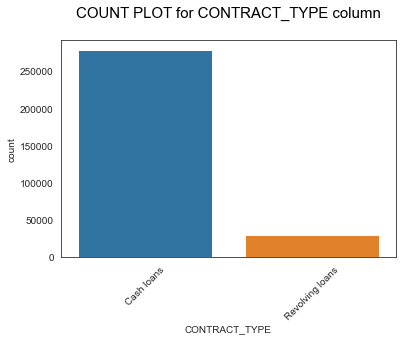


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for GENDER column: 

Female    65.835694
Male      34.164306
Name: GENDER, dtype: float64

............................................................

Mode of GENDER column:  Female

............................................................

Percentage of null values for GENDER column:  0.0

............................................................



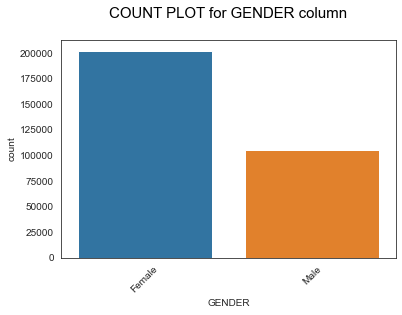


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FLAG_OWN_CAR column: 

No     65.989184
Yes    34.010816
Name: FLAG_OWN_CAR, dtype: float64

............................................................

Mode of FLAG_OWN_CAR column:  No

............................................................

Percentage of null values for FLAG_OWN_CAR column:  0.0

............................................................



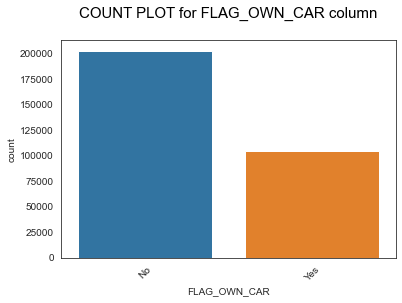


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FLAG_OWN_REALTY column: 

Yes    69.367275
No     30.632725
Name: FLAG_OWN_REALTY, dtype: float64

............................................................

Mode of FLAG_OWN_REALTY column:  Yes

............................................................

Percentage of null values for FLAG_OWN_REALTY column:  0.0

............................................................



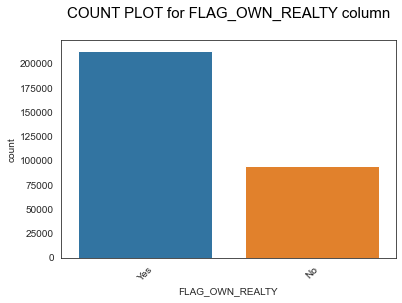


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_TYPE_SUITE column: 

Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64

............................................................

Mode of NAME_TYPE_SUITE column:  Unaccompanied

............................................................

Percentage of null values for NAME_TYPE_SUITE column:  0.0

............................................................



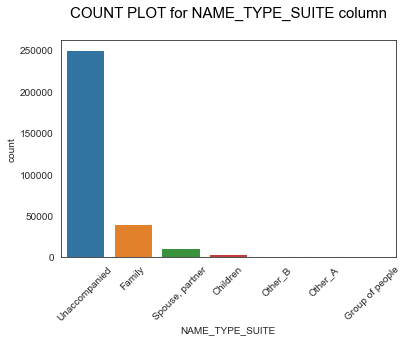


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for INCOME_TYPE column: 

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: INCOME_TYPE, dtype: float64

............................................................

Mode of INCOME_TYPE column:  Working

............................................................

Percentage of null values for INCOME_TYPE column:  0.0

............................................................



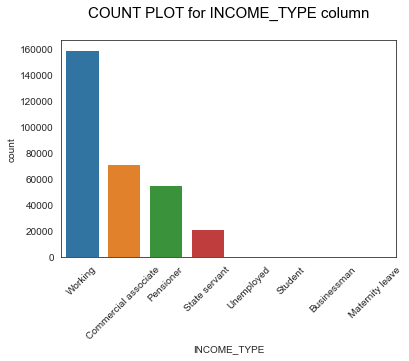


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for EDUCATION_TYPE column: 

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: EDUCATION_TYPE, dtype: float64

............................................................

Mode of EDUCATION_TYPE column:  Secondary / secondary special

............................................................

Percentage of null values for EDUCATION_TYPE column:  0.0

............................................................



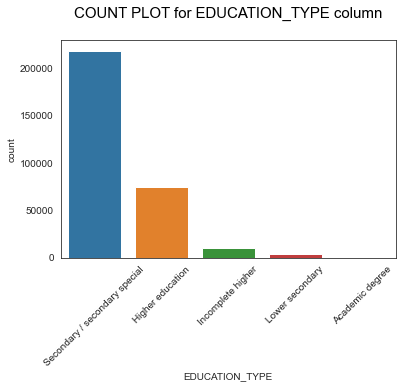


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FAMILY_STATUS column: 

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: FAMILY_STATUS, dtype: float64

............................................................

Mode of FAMILY_STATUS column:  Married

............................................................

Percentage of null values for FAMILY_STATUS column:  0.0

............................................................



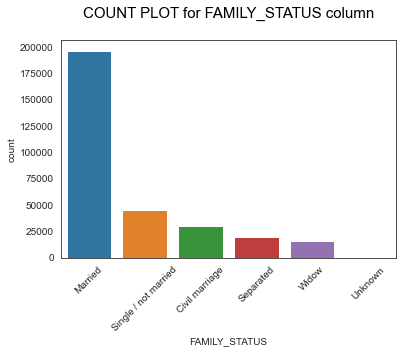


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for HOUSING_TYPE column: 

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: HOUSING_TYPE, dtype: float64

............................................................

Mode of HOUSING_TYPE column:  House / apartment

............................................................

Percentage of null values for HOUSING_TYPE column:  0.0

............................................................



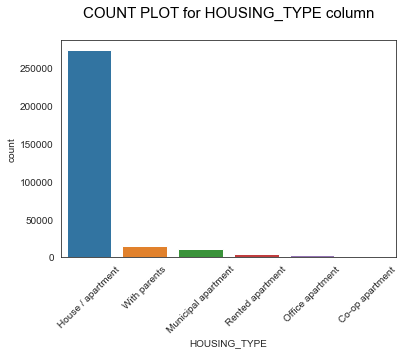


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FLAG_MOBIL column: 

1    99.999675
0     0.000325
Name: FLAG_MOBIL, dtype: float64

............................................................

Mode of FLAG_MOBIL column:  1

............................................................

Percentage of null values for FLAG_MOBIL column:  0.0

............................................................



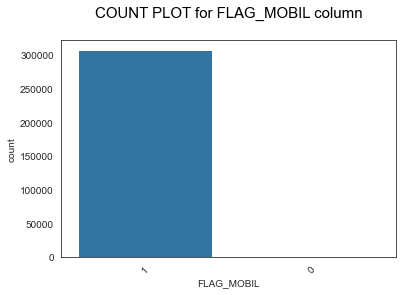


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for OCCUPATION_TYPE column: 

Laborers                 49.291570
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

............................................................

Mode of OCCUPATION_TYPE column:  Laborers

............................................................

Percentage of null values for OCCUPATION_TYPE column: 

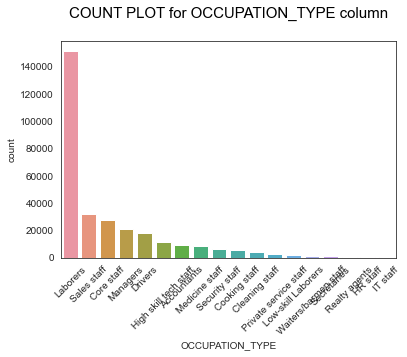


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for REGION_RATING_CLIENT column: 

2    73.813294
3    15.716511
1    10.470195
Name: REGION_RATING_CLIENT, dtype: float64

............................................................

Mode of REGION_RATING_CLIENT column:  2

............................................................

Percentage of null values for REGION_RATING_CLIENT column:  0.0

............................................................



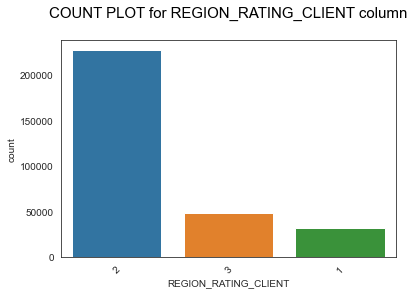


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for WEEKDAY_APPR_PROCESS_START column: 

TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

............................................................

Mode of WEEKDAY_APPR_PROCESS_START column:  TUESDAY

............................................................

Percentage of null values for WEEKDAY_APPR_PROCESS_START column:  0.0

............................................................



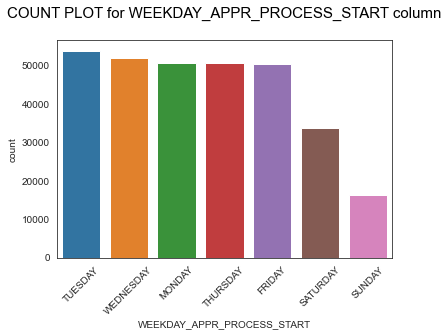


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for HOUR_APPR_PROCESS_START column: 

10    12.266878
11    12.106559
12    11.132285
13    10.067607
14     9.001954
9      8.905047
15     8.077435
16     6.629031
8      4.919174
17     4.845355
7      2.969325
18     2.942659
6      1.899769
19     1.251337
5      1.183047
4      0.679650
3      0.399986
20     0.388929
21     0.131703
2      0.099183
22     0.048779
1      0.027966
23     0.013333
0      0.013008
Name: HOUR_APPR_PROCESS_START, dtype: float64

............................................................

Mode of HOUR_APPR_PROCESS_START column:  10

............................................................

Percentage of null values for HOUR_APPR_PROCESS_START column:  0.0

............................................................



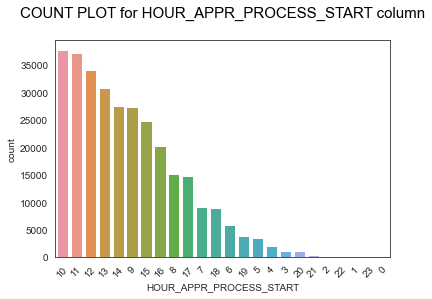


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for LIVE_CITY_NOT_WORK_CITY column: 

0    82.044545
1    17.955455
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

............................................................

Mode of LIVE_CITY_NOT_WORK_CITY column:  0

............................................................

Percentage of null values for LIVE_CITY_NOT_WORK_CITY column:  0.0

............................................................



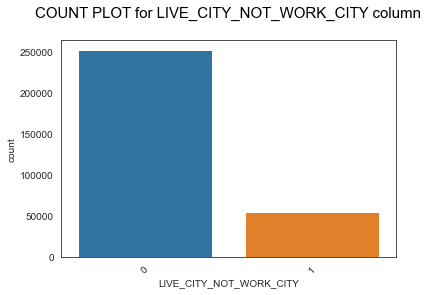


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for ORGANIZATION_TYPE column: 

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                  

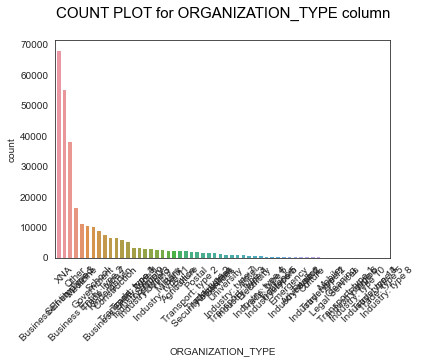


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FLAG_DOCUMENT_3 column: 

1    71.002338
0    28.997662
Name: FLAG_DOCUMENT_3, dtype: float64

............................................................

Mode of FLAG_DOCUMENT_3 column:  1

............................................................

Percentage of null values for FLAG_DOCUMENT_3 column:  0.0

............................................................



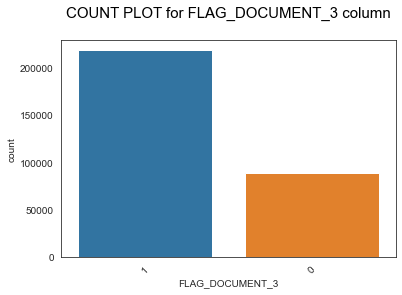


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for AGE_GROUP column: 

30-40    27.028952
40-50    24.194582
50-60    22.054170
20-30    17.171743
>=60      9.550227
<=20      0.000325
Name: AGE_GROUP, dtype: float64

............................................................

Mode of AGE_GROUP column:  30-40

............................................................

Percentage of null values for AGE_GROUP column:  0.0

............................................................



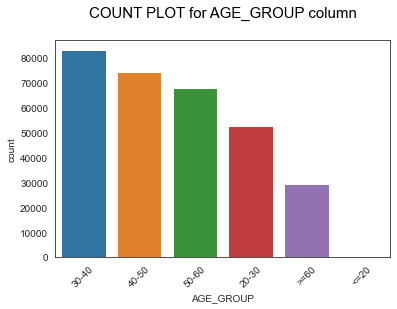


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for INCOME_RANGE column: 

<250,000             87.064528
250,000-500,000      12.056804
500,000-750,000       0.669244
750,000-1,000,000     0.128125
>1,000,000            0.081298
Name: INCOME_RANGE, dtype: float64

............................................................

Mode of INCOME_RANGE column:  <250,000

............................................................

Percentage of null values for INCOME_RANGE column:  0.0

............................................................



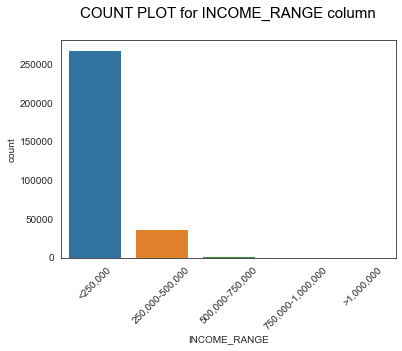


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [170]:
# Current applications data

for i in categorical_columns:
    print()
    print('Value counts (%) for {} column: '.format(i))
    print()
    print((app[i].value_counts(normalize=True)*100).sort_values(ascending=False))
    print()
    print('.' * 60)
    print()
    print('Mode of {} column: '.format(i), app[i].mode()[0])
    print()
    print('.' * 60)
    print()
    print('Percentage of null values for {} column: '.format(i), app[i].isnull().sum()*100/len(app))
    print()
    print('.' * 60)
    print()
    sns.countplot(app[i],order = app[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('COUNT PLOT for {} column\n'.format(i),fontdict={'color':'k','fontsize':15})
    plt.show()
    print()
    print('X'*60)


Value counts (%) for NAME_CONTRACT_TYPE column: 

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

............................................................

Mode of NAME_CONTRACT_TYPE column:  Cash loans

............................................................

Percentage of null values for NAME_CONTRACT_TYPE column:  0.0

............................................................



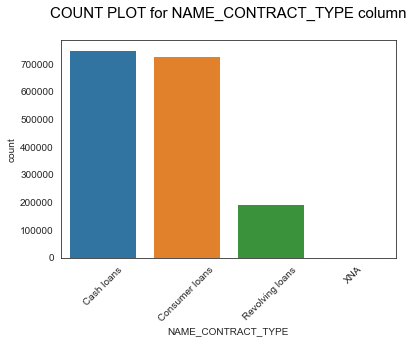


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for WEEKDAY_APPR_PROCESS_START column: 

TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

............................................................

Mode of WEEKDAY_APPR_PROCESS_START column:  TUESDAY

............................................................

Percentage of null values for WEEKDAY_APPR_PROCESS_START column:  0.0

............................................................



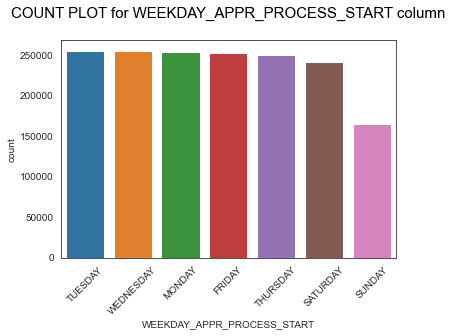


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for FLAG_LAST_APPL_PER_CONTRACT column: 

Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

............................................................

Mode of FLAG_LAST_APPL_PER_CONTRACT column:  Y

............................................................

Percentage of null values for FLAG_LAST_APPL_PER_CONTRACT column:  0.0

............................................................



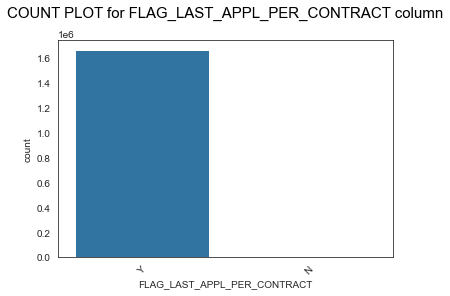


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_CASH_LOAN_PURPOSE column: 

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business 

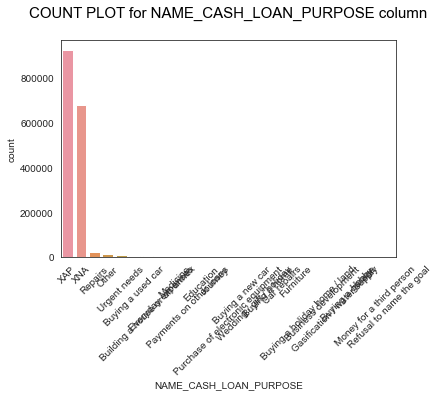


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_CONTRACT_STATUS column: 

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

............................................................

Mode of NAME_CONTRACT_STATUS column:  Approved

............................................................

Percentage of null values for NAME_CONTRACT_STATUS column:  0.0

............................................................



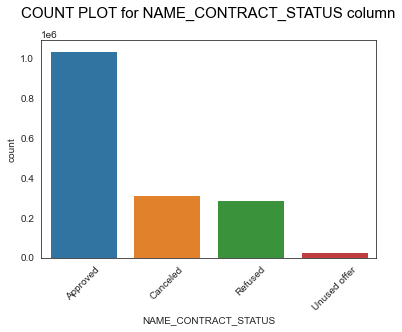


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_PAYMENT_TYPE column: 

Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

............................................................

Mode of NAME_PAYMENT_TYPE column:  Cash through the bank

............................................................

Percentage of null values for NAME_PAYMENT_TYPE column:  0.0

............................................................



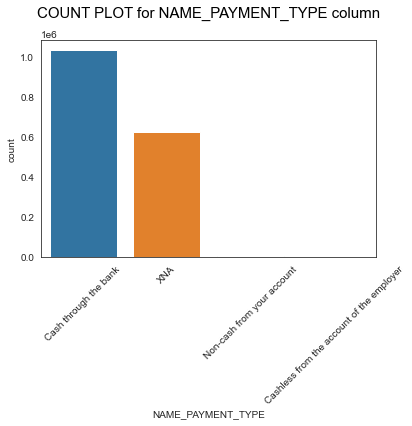


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_CLIENT_TYPE column: 

Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

............................................................

Mode of NAME_CLIENT_TYPE column:  Repeater

............................................................

Percentage of null values for NAME_CLIENT_TYPE column:  0.0

............................................................



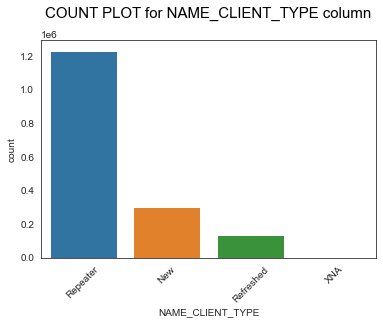


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_GOODS_CATEGORY column: 

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education   

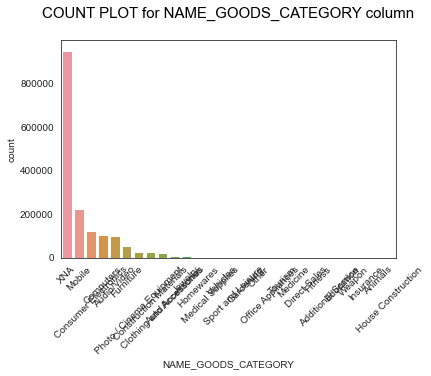


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_PORTFOLIO column: 

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

............................................................

Mode of NAME_PORTFOLIO column:  POS

............................................................

Percentage of null values for NAME_PORTFOLIO column:  0.0

............................................................



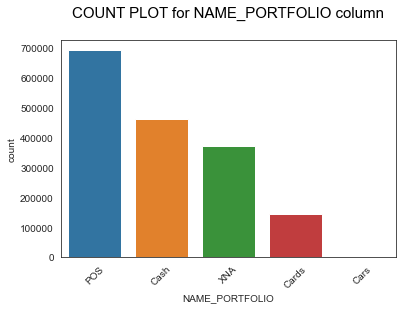


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_PRODUCT_TYPE column: 

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

............................................................

Mode of NAME_PRODUCT_TYPE column:  XNA

............................................................

Percentage of null values for NAME_PRODUCT_TYPE column:  0.0

............................................................



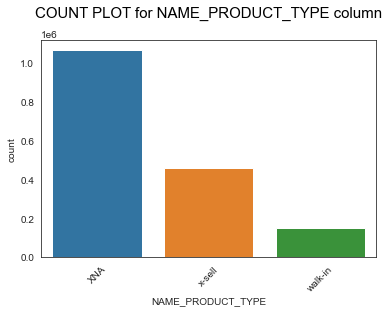


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for CHANNEL_TYPE column: 

Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64

............................................................

Mode of CHANNEL_TYPE column:  Credit and cash offices

............................................................

Percentage of null values for CHANNEL_TYPE column:  0.0

............................................................



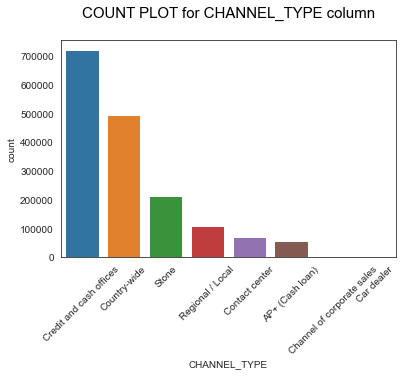


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Value counts (%) for NAME_SELLER_INDUSTRY column: 

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

............................................................

Mode of NAME_SELLER_INDUSTRY column:  XNA

............................................................

Percentage of null values for NAME_SELLER_INDUSTRY column:  0.0

............................................................



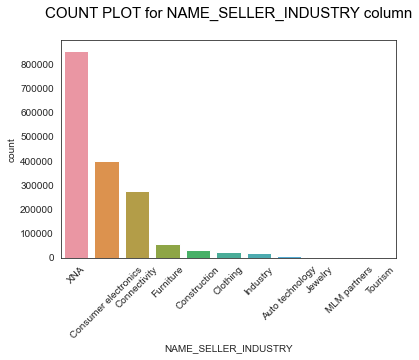


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [171]:
# Previous applications data

for i in categorical_columns_prev:
    print()
    print('Value counts (%) for {} column: '.format(i))
    print()
    print((prev_app[i].value_counts(normalize=True)*100).sort_values(ascending=False))
    print()
    print('.' * 60)
    print()
    print('Mode of {} column: '.format(i), prev_app[i].mode()[0])
    print()
    print('.' * 60)
    print()
    print('Percentage of null values for {} column: '.format(i), prev_app[i].isnull().sum()*100/len(prev_app))
    print()
    print('.' * 60)
    print()
    sns.countplot(prev_app[i],order = prev_app[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.title('COUNT PLOT for {} column\n'.format(i),fontdict={'color':'k','fontsize':15})
    plt.show()
    print()
    print('X'*60)

### Findings <a ID="5.3.2.1"></a>
[Table of Contents](#0.1)

- Replaced F / M in Gender column as Female and Male
- Replaced Y / N in Own_car and Own_reality columns as Yes / No

### 5-D Outlier Analysis <a ID="5.4"></a>
[Table of Contents](#0.1)


Distribution of SK_ID_CURR column:


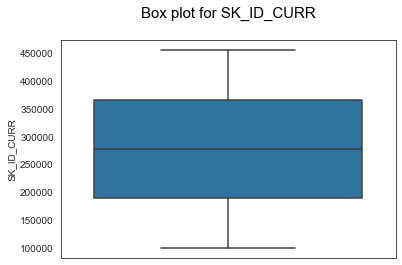


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of TARGET column:


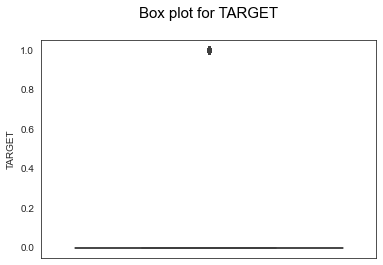


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of CNT_CHILDREN column:


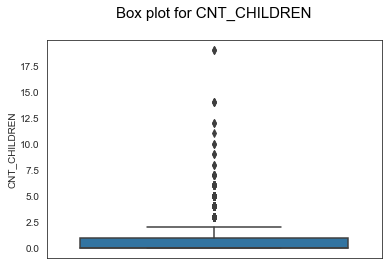


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_INCOME_TOTAL column:


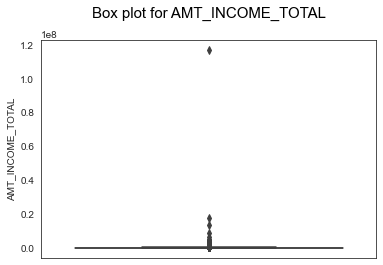


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_CREDIT column:


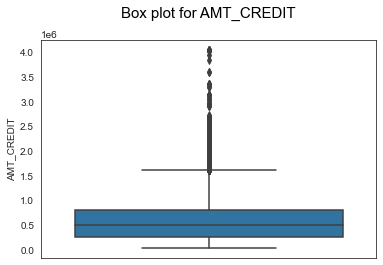


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_ANNUITY column:


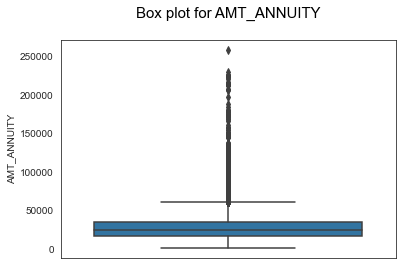


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_GOODS_PRICE column:


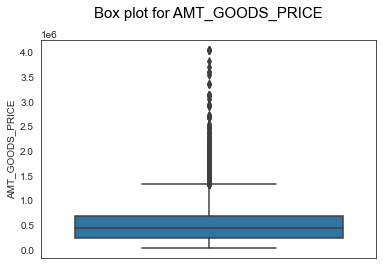


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AGE column:


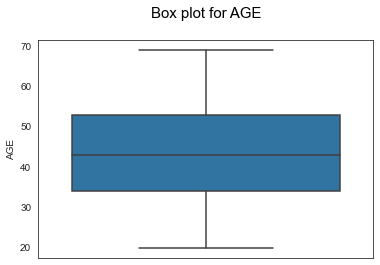


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of YEARS_EMPLOYED column:


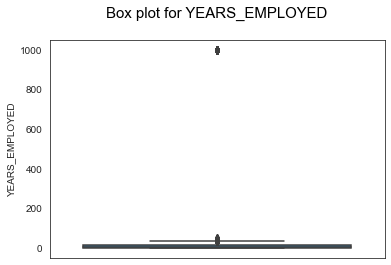


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of YEARS_REGISTRATION column:


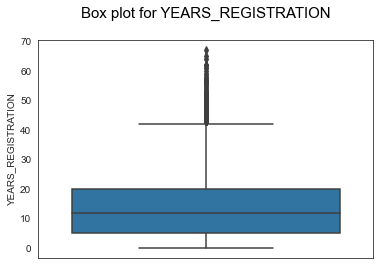


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of YEARS_ID_PUBLISH column:


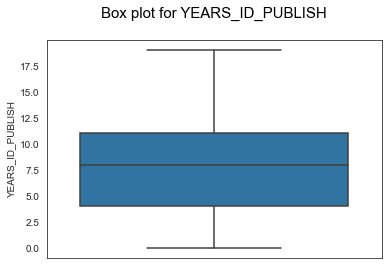


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of FLAG_EMP_PHONE column:


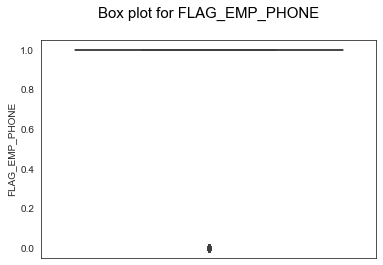


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of FLAG_CONT_MOBILE column:


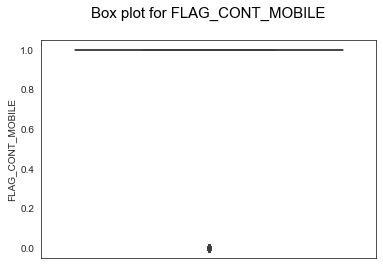


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of CNT_FAM_MEMBERS column:


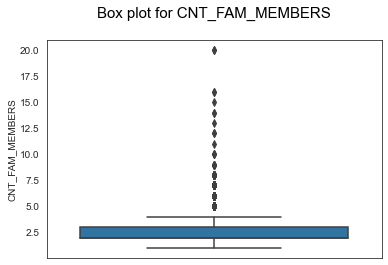


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of REG_REGION_NOT_LIVE_REGION column:


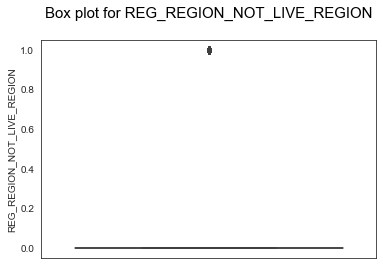


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of EXT_SOURCE_2 column:


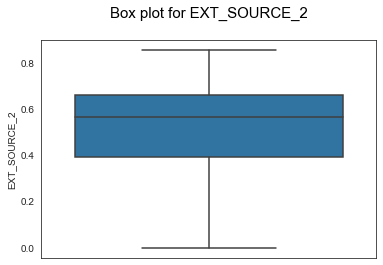


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of EXT_SOURCE_3 column:


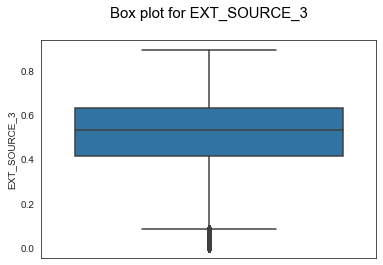


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of OBS_60_CNT_SOCIAL_CIRCLE column:


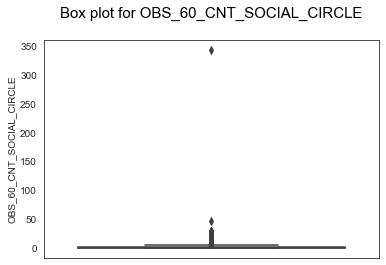


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of DEF_60_CNT_SOCIAL_CIRCLE column:


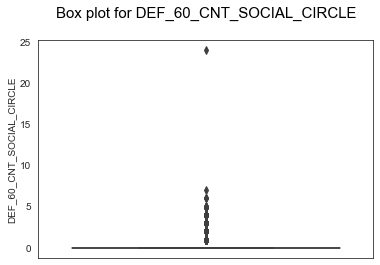


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of YEARS_LAST_PHONE_CHANGE column:


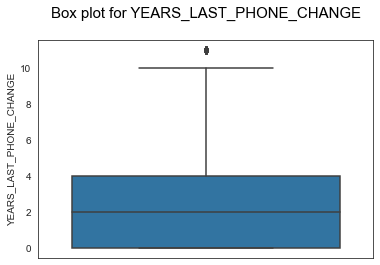


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [173]:
# Current Applications data
# Checking distribution of continous columns (numeric)

for i in continous_columns:
    print()
    print('Distribution of {} column:'.format(i))
    sns.boxplot(y=app[i])
    plt.title('Box plot for {}\n'.format(i),fontdict={'fontsize':15,'color':'k'})
    plt.show()
    print()
    print('x'*100)


Distribution of SK_ID_PREV column:


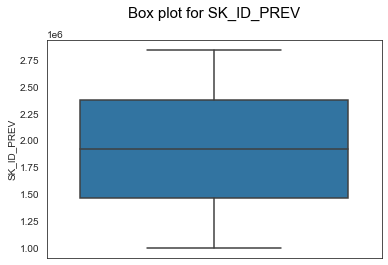


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of SK_ID_CURR column:


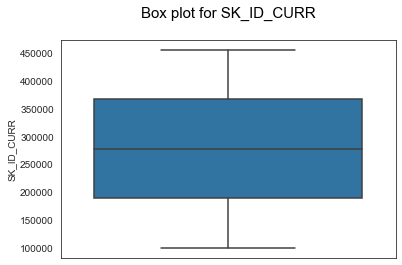


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_ANNUITY column:


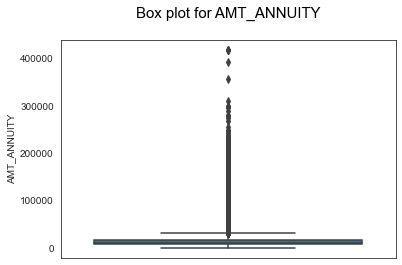


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_APPLICATION column:


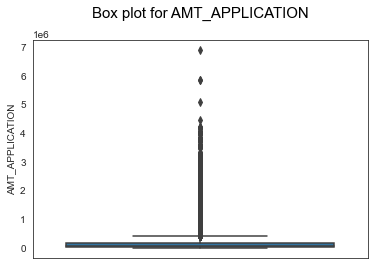


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_CREDIT column:


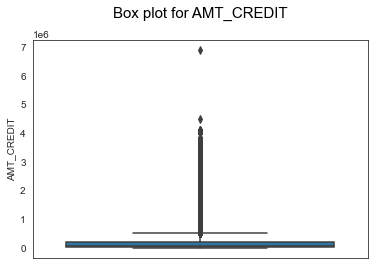


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of AMT_GOODS_PRICE column:


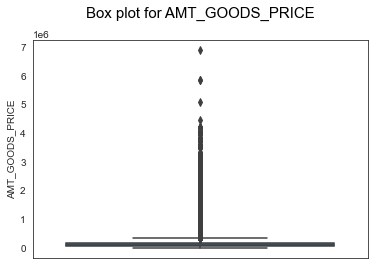


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of HOUR_APPR_PROCESS_START column:


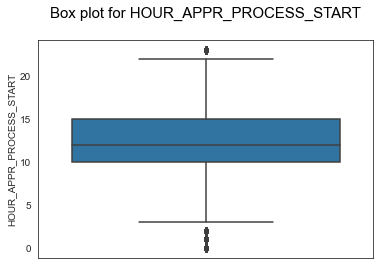


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of NFLAG_LAST_APPL_IN_DAY column:


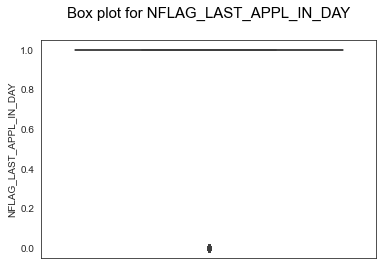


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of DAYS_DECISION column:


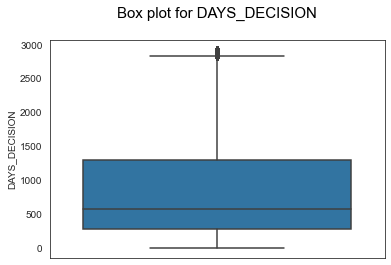


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Distribution of CNT_PAYMENT column:


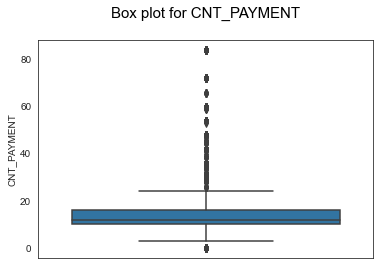


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [174]:
# Previous Applications data
# Checking distribution of continous columns (numeric)

for i in continous_columns_prev:
    print()
    print('Distribution of {} column:'.format(i))
    plt.title('Box plot for {}\n'.format(i),fontdict={'fontsize':15,'color':'k'})
    sns.boxplot(y=prev_app[i])
    plt.show()
    print()
    print('x'*100)

### Findings <a ID="5.4.1"></a>
[Table of Contents](#0.1)

- Since it was mentioned that for this exercise, it is not necessary to remove any data points, No changes have been made in the context of outliers


<font color = red> Current Applications data:</font>

1. CNT_CHILDREN has outliers. Count of children more than 3 are oultiers in the data. Max children count is 19
2. AMT_INCOME_TOTAL has outliers. Individuals Income who fall under these outliers has income much more than the rest of the individuals.
3. AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE has outliers
4. DAYS_EMPLOYED has a lot of outliers where years of employment is shown as 1000 years
5. LAST_PHONE_CHANGE has an outlier where applicant has not changed phone for more than 10 years
6. COUNT_FAMILY_MEMBERS has outliers where total family members more than 5


<font color = red> Previous Applications data:</font>

1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT has outliers
2. CNT_PAYMENT has few outliers
3. DAYS_DECISION  has few outliers

### 6 Data Analysis <a ID="6"></a>


### 6-A Imbalance Ratio <a ID="6.1"></a>
[Table of Contents](#0.1)

In [74]:
# Checking imbalance ratio for target variable
# Definiting imbalance for target variable: ratio of defaulters to the total number of applications

Ratio_of_imbalance = round(app['TARGET'].value_counts()[1] * 100/ len(app),2)

print()
print('Ratio of imbalance for TARGET variable: ', Ratio_of_imbalance)
print()


Ratio of imbalance for TARGET variable:  8.07



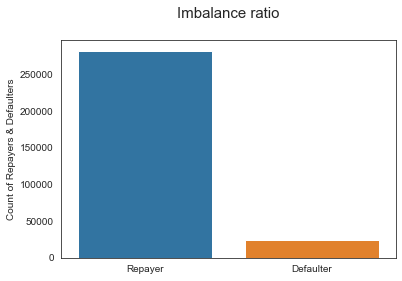

In [175]:
# Visualizing imbalance

sns.barplot(x=['Repayer','Defaulter'],y='TARGET',data=app['TARGET'].value_counts().reset_index())

plt.ylabel("Count of Repayers & Defaulters")

plt.title('Imbalance ratio\n',fontdict={'size':15})

plt.show()

### Findings<a ID="6.1.1">
[Table of Contents](#0.1)
    
- From the above, we can say that Current Applications dataset is highly imbalanced. Imbalance ratio is ~ 8% i.e., 8 out of 100 applicants are defaulting the loans

### 6-B Univariate Analysis <a ID="6.2"></a>
[Table of Contents](#0.1)

- Since there are a number of columns, slecting below columns for further anlalysis

In [176]:
defaulters = app[app['TARGET'] ==1 ]
repayers = app[app['TARGET'] ==1 ]

In [76]:
# Current Applications data
# Selecting columns for Analysis

analysis_cols = ['CNT_CHILDREN','CONTRACT_TYPE','HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','AMT_INCOME_TOTAL','AMT_CREDIT','AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','TARGET','CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION_TYPE','FAMILY_STATUS','OCCUPATION_TYPE','FLAG_DOCUMENT_3']

### Categorical <a ID="6.2.1"></a>
[Table of Contents](#0.1)

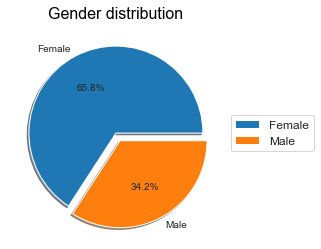

In [77]:
# Current Applications data
# Analyzing Gender type

plt.pie(app['GENDER'].value_counts(normalize=True), explode=[0,0.1], autopct='%1.1f%%',
        labels=app['GENDER'].unique().sort_values(),shadow=True)

plt.title('Gender distribution',fontdict={'fontsize':16,'color':'k'})

plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc="center left", fontsize=12)

plt.show()

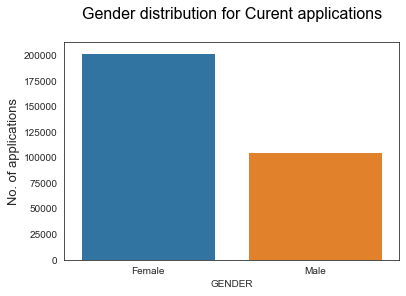

In [78]:
# Current Applications data


sns.countplot(data=app,x='GENDER')

plt.ylabel('No. of applications',fontdict={'fontsize':13})

plt.title('Gender distribution for Curent applications\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

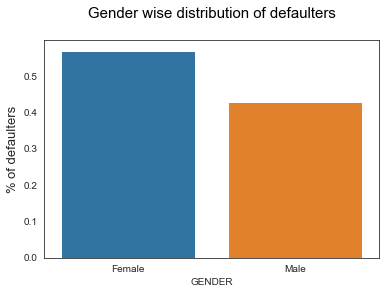

In [182]:
# Analyzing Gender type for defaluters

gender =defaulters[['GENDER', 'TARGET']].groupby(['GENDER'],as_index=False).sum()

gender['TARGET']= gender['TARGET'] / gender['TARGET'].sum()

gender = gender.sort_values(by='TARGET',ascending=False)

sns.barplot(data=gender,x='GENDER',y='TARGET',order=gender['GENDER'])

plt.ylabel('% of defaulters',fontdict={'fontsize':13})

plt.title('Gender wise distribution of defaulters\n',fontdict={'fontsize':15,'color':'k'})

plt.show()

### Findings:
- Majority of the applicants are females with 65.8% applications
- Women are majority of the defaluters with defalut rate of more than 50%

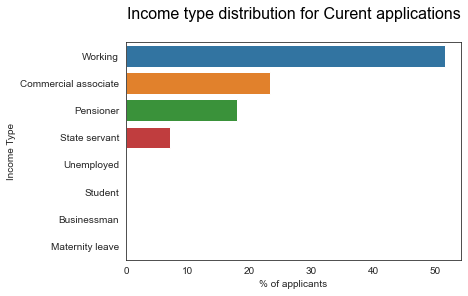

In [80]:
# Analyzing income type 

inc = (app.INCOME_TYPE.value_counts(normalize=True)*100).reset_index()

sns.barplot(data=inc,y='index',x='INCOME_TYPE',order=inc['index'])

plt.ylabel('Income Type')

plt.xlabel('% of applicants')

plt.title('Income type distribution for Curent applications\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

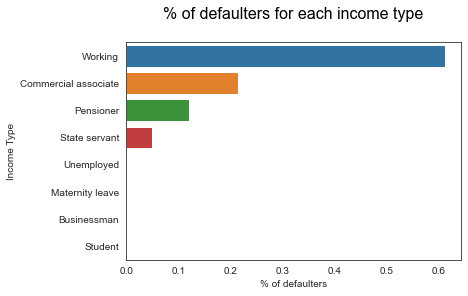

In [183]:
# Analyzing income type for defaulters 

inc_def = (defaulters.groupby(by='INCOME_TYPE',as_index=False)['INCOME_TYPE','TARGET'].sum()).sort_values(by='TARGET',ascending=False)

inc_def['TARGET'] = inc_def['TARGET'] / inc_def['TARGET'].sum() 

sns.barplot(data=inc_def,x='TARGET',y='INCOME_TYPE',order=inc_def['INCOME_TYPE'].unique())

plt.ylabel('Income Type')

plt.xlabel('% of defaulters')

plt.title('% of defaulters for each income type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings:
- More than 50% of the applicants are from working class followed by commercial associates and pensioners
- Of all the income types, Working people are defulting more with a default rate of more than 60%
- Students have 0% default rate


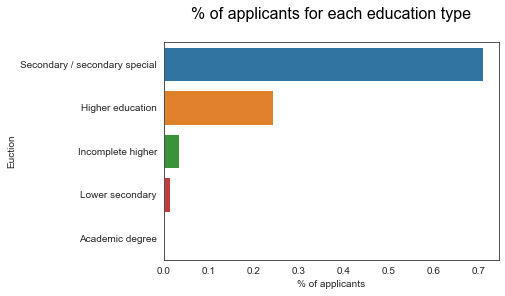

In [82]:
# Analyzing education type 

edu = (app['EDUCATION_TYPE'].value_counts(normalize=True).reset_index()).sort_values('EDUCATION_TYPE',ascending=False)

sns.barplot(data=edu,y='index',x='EDUCATION_TYPE',order=edu['index'].unique())

plt.ylabel('Euction')

plt.xlabel('% of applicants')

plt.title('% of applicants for each education type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

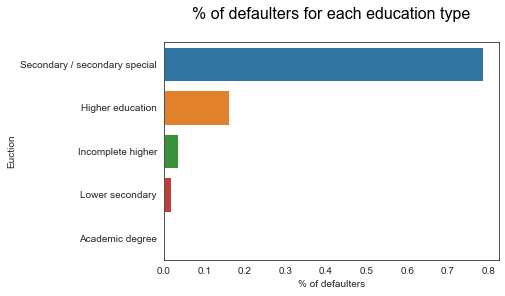

In [184]:
# Analyzing education type for defaulters

edu_def = (defaulters.groupby(by='EDUCATION_TYPE',as_index=False)['EDUCATION_TYPE','TARGET'].sum()).sort_values(by='TARGET',ascending=False)

edu_def['TARGET'] = edu_def['TARGET'] / edu_def['TARGET'].sum() 

sns.barplot(data=edu_def,y='EDUCATION_TYPE',x='TARGET',order=edu_def['EDUCATION_TYPE'].unique())

plt.ylabel('Euction')

plt.xlabel('% of defaulters')

plt.title('% of defaulters for each education type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- 70% of the applicants have secondary / secondary special education
- More than 80% of defaulters have secondary / secondary special education

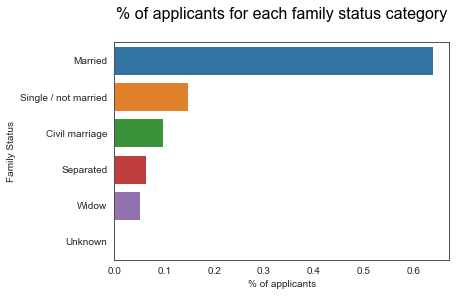

In [84]:
# Analyzing Family type

fam =(app['FAMILY_STATUS'].value_counts(normalize=True).reset_index()).sort_values('FAMILY_STATUS',ascending=False)

sns.barplot(data=fam,y='index',x='FAMILY_STATUS',order=fam['index'].unique())

plt.ylabel('Family Status')

plt.xlabel('% of applicants')

plt.title('% of applicants for each family status category\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

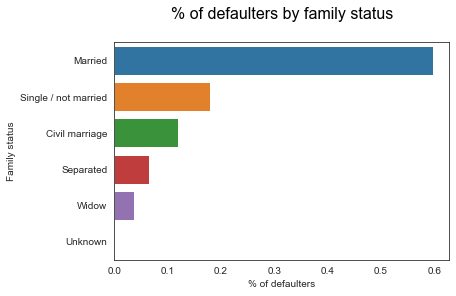

In [185]:
# Analyzing Family type for defaulters

fam_def = (defaulters.groupby(by='FAMILY_STATUS',as_index=False)[['FAMILY_STATUS','TARGET']].sum()).sort_values(by='TARGET',ascending=False)

fam_def['TARGET'] = fam_def['TARGET'] / fam_def['TARGET'].sum()

sns.barplot(data=fam_def,y='FAMILY_STATUS',x='TARGET',order=fam_def['FAMILY_STATUS'].unique())

plt.ylabel('Family status')

plt.xlabel('% of defaulters')

plt.title('% of defaulters by family status\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- Married people the most applicants for the laon with 60% of loans by them.
- Married people are defaulting the loans at 60% default rate

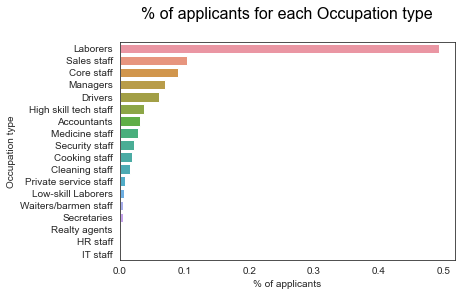

In [86]:
# Analyzing Occupation type

occ = (app['OCCUPATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).reset_index())

sns.barplot(data=occ, x='OCCUPATION_TYPE',y='index',order=occ['index'].unique())

plt.ylabel('Occupation type')

plt.xlabel('% of applicants')

plt.title('% of applicants for each Occupation type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

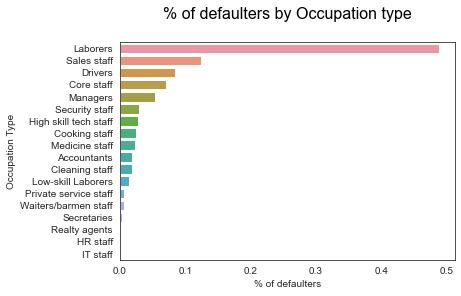

In [186]:
# Analyzing Occupation type for defaulters

occ_def = (defaulters[['OCCUPATION_TYPE','TARGET']].groupby('OCCUPATION_TYPE',as_index=False).sum()).sort_values('TARGET',ascending=False)

occ_def['TARGET'] = occ_def['TARGET'] / occ_def['TARGET'].sum()

sns.barplot(data=occ_def,y='OCCUPATION_TYPE',x='TARGET',order=occ_def['OCCUPATION_TYPE'].unique())

plt.ylabel('Occupation Type')

plt.xlabel('% of defaulters')

plt.title('% of defaulters by Occupation type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()


### Findings
- Majority of the loan applicants are laborers with 50% of applications. Least number of applications recieved are from IT an HR staff
- Laborers are defaluting the loans more than anyone with a 50% default rate

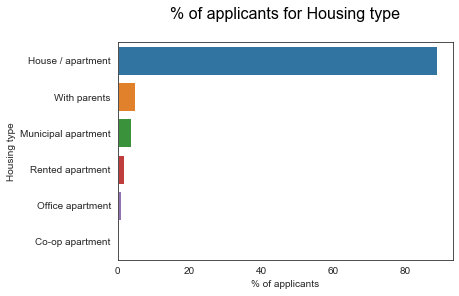

In [88]:
# Analyzing Housing type 

Housing = (app['HOUSING_TYPE'].value_counts(normalize=True)*100).reset_index()

sns.barplot(data=Housing,y='index',x='HOUSING_TYPE',order=Housing['index'].unique())

plt.ylabel('Housing type')

plt.xlabel('% of applicants')

plt.title('% of applicants for Housing type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

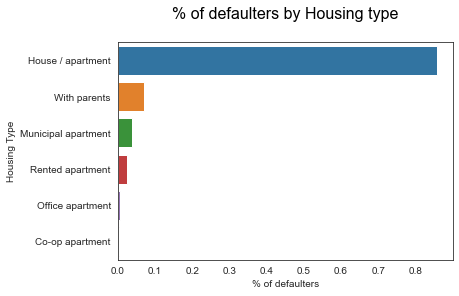

In [187]:
# Analyzing Housing type for defaulters

Housing_def = (defaulters[['HOUSING_TYPE','TARGET']].groupby('HOUSING_TYPE',as_index=False).sum()).sort_values('TARGET',ascending=False)

Housing_def.TARGET = Housing_def.TARGET / Housing_def.TARGET.sum()

sns.barplot(data=Housing_def,y='HOUSING_TYPE',x= 'TARGET',order=Housing_def['HOUSING_TYPE'].unique())

plt.ylabel('Housing Type')

plt.xlabel('% of defaulters')

plt.title('% of defaulters by Housing type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- More than 80% of applicants live in either own house or own apartment
- 80% of the defaulters have their own house / apartment

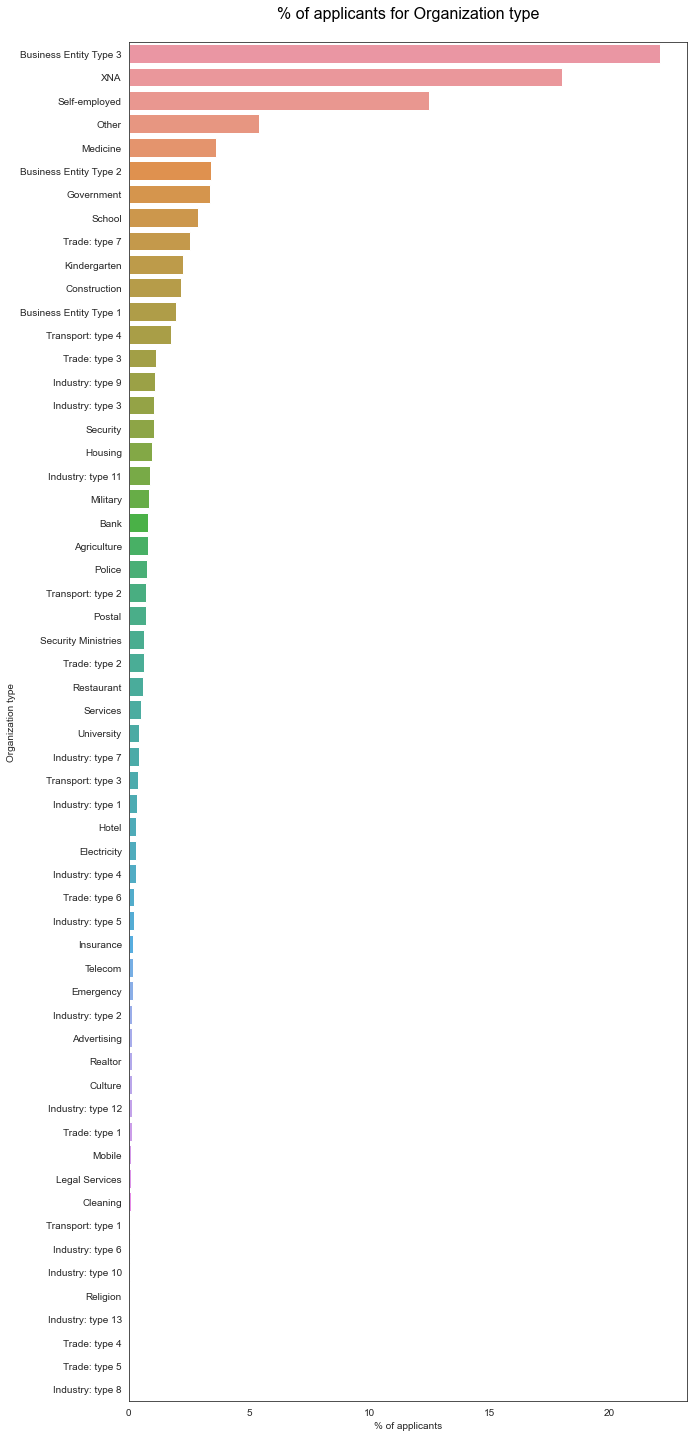

In [90]:
# Analyzing ORGANIZATION_TYPE

plt.figure(figsize=(10,25))

Org = (app['ORGANIZATION_TYPE'].value_counts(normalize=True)*100).reset_index()

sns.barplot(data=Org,y='index',x='ORGANIZATION_TYPE',order=Org['index'].unique())

plt.ylabel('Organization type')

plt.xlabel('% of applicants')

plt.title('% of applicants for Organization type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

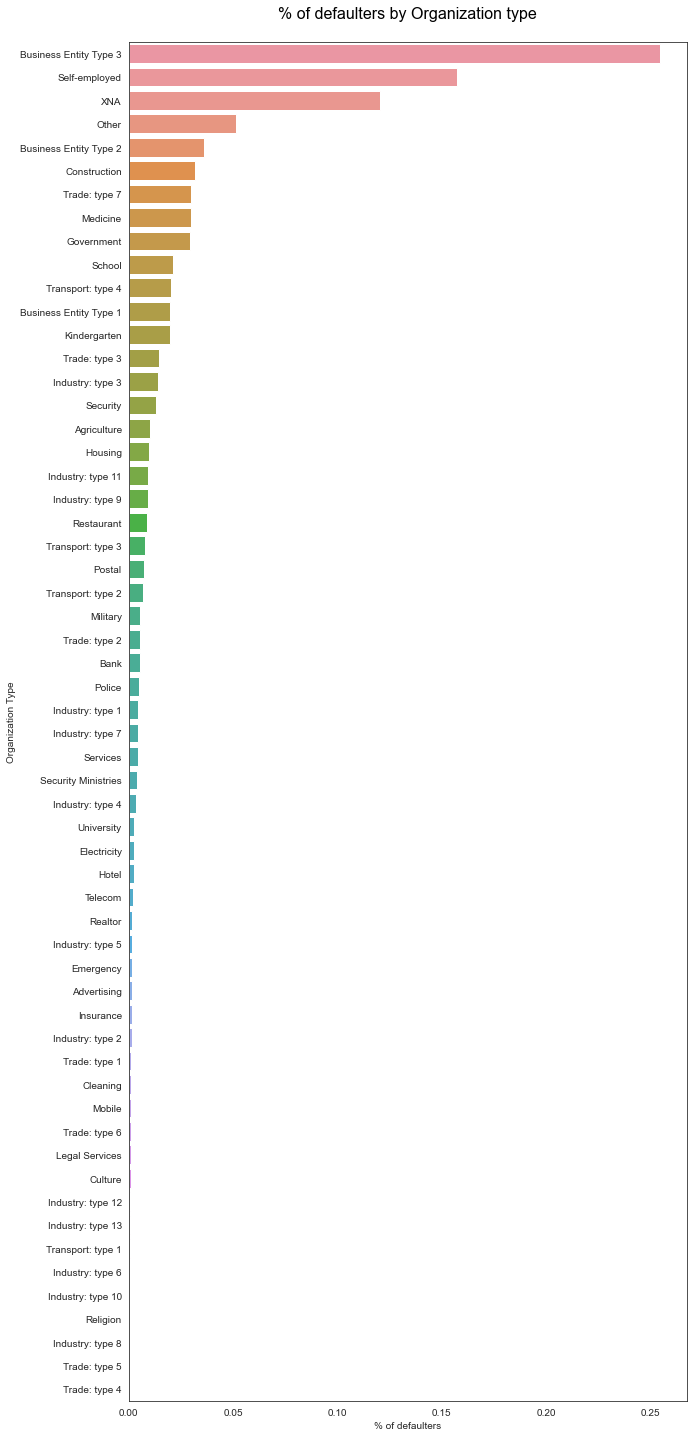

In [188]:
# Analyzing ORGANIZATION_TYPE for defaulters

Org_def = (defaulters[['ORGANIZATION_TYPE','TARGET']].groupby('ORGANIZATION_TYPE',as_index=False).sum()).sort_values('TARGET',ascending=False)

Org_def.TARGET = Org_def.TARGET / Org_def.TARGET.sum()

plt.figure(figsize=(10,25))

sns.barplot(data=Org_def,y='ORGANIZATION_TYPE',x='TARGET',order=Org_def['ORGANIZATION_TYPE'])

plt.ylabel('Organization Type')

plt.xlabel('% of defaulters')

plt.title('% of defaulters by Organization type\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings

- People who belongs to Business Entity type 3 are the top 1 applicants for loans
- Business entity type 3 and self employed people default more.

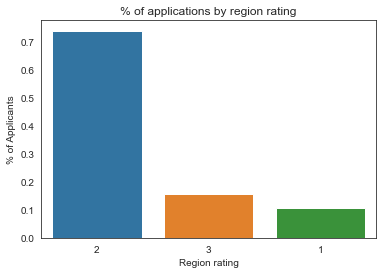

In [92]:
# Analyzing REGION_RATING_CLIENT

reg = (app['REGION_RATING_CLIENT'].value_counts(normalize=True)).reset_index()

sns.barplot(data=reg,x='index',y='REGION_RATING_CLIENT',order=reg['index'].unique())

plt.xlabel('Region rating')

plt.ylabel('% of Applicants')

plt.title('% of applications by region rating')

plt.show()

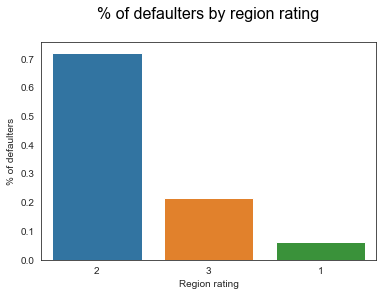

In [191]:
# Analyzing REGION_RATING_CLIENT for defaulters

reg_def = (defaulters[['REGION_RATING_CLIENT','TARGET']].groupby('REGION_RATING_CLIENT',as_index=False).sum()).sort_values('TARGET',ascending=False)

reg_def.TARGET = reg_def.TARGET / reg_def.TARGET.sum()

sns.barplot(data=reg_def,y='TARGET',x='REGION_RATING_CLIENT',order=reg_def['REGION_RATING_CLIENT'])

plt.ylabel('% of defaulters')

plt.xlabel('Region rating')

plt.title('% of defaulters by region rating\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- More than 70% of applicants are from region rating 2
- Over 70% of defaulters are coming from region rating 2

### Numerical <a ID="6.2.2"></a>
[Table of Contents](#0.1)

In [94]:
# Bucketing AGE into AGE GROUPS

app['AGE_GROUP'] = pd.cut(x=app['AGE'],bins=[1,20,30,40,50,60,70],labels=['<=20','20-30','30-40','40-50','50-60','>=60'])

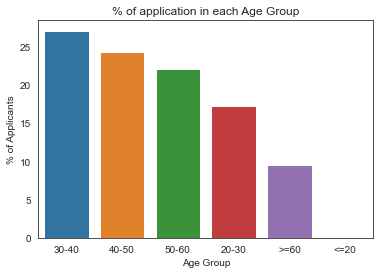

In [95]:
# Analyzing Age Group

age = (app['AGE_GROUP'].value_counts(normalize=True)*100).reset_index()

sns.barplot(data=age,x='index',y='AGE_GROUP',order=age['index'])

plt.xlabel('Age Group')

plt.ylabel('% of Applicants')

plt.title('% of application in each Age Group')

plt.show()

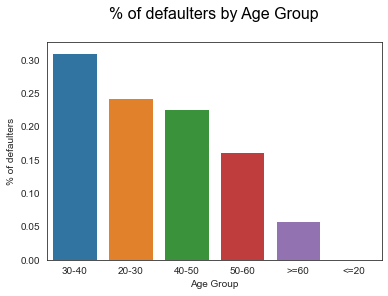

In [192]:
# Analyzing Age Group for defaulters

age_def = (defaulters[['AGE_GROUP','TARGET']].groupby('AGE_GROUP',as_index=False).sum()).sort_values('TARGET',ascending=False)

age_def.TARGET = age_def.TARGET / age_def.TARGET.sum()

sns.barplot(data=age_def,y='TARGET',x='AGE_GROUP',order=age_def['AGE_GROUP'])

plt.ylabel('% of defaulters')

plt.xlabel('Age Group')

plt.title('% of defaulters by Age Group\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- More than 25% of applicants belongs to 30-40 age group
- People belonging to 30-40 age group tends to default loans more comparatively

In [97]:
# Bucketing AMT_INCOME_TOTAL into INCOME_RANGE

app['INCOME_RANGE'] = pd.cut(x=app['AMT_INCOME_TOTAL'],bins=[1,250000,500000,750000,1000000,120000000],
                             labels=['<250,000','250,000-500,000','500,000-750,000','750,000-1,000,000','>1,000,000'])

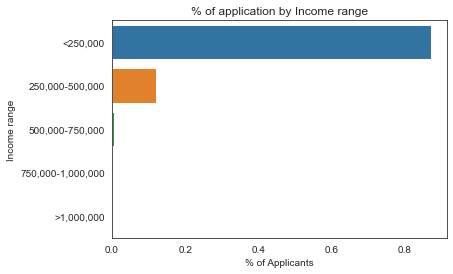

In [98]:
# Analyzing Income Range

income = (app['INCOME_RANGE'].value_counts(normalize=True)).reset_index()

sns.barplot(data=income,y='index',x='INCOME_RANGE',order=income['index'])

plt.xlabel('% of Applicants')

plt.ylabel('Income range')

plt.title('% of application by Income range')

plt.show()

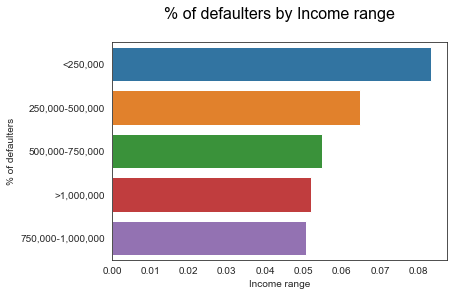

In [99]:
# Analyzing Income range for defaulters

income_def = (app[['INCOME_RANGE','TARGET']].groupby('INCOME_RANGE',as_index=False).mean()).sort_values('TARGET',ascending=False)

sns.barplot(data=income_def,x='TARGET',y='INCOME_RANGE',order=income_def['INCOME_RANGE'])

plt.ylabel('% of defaulters')

plt.xlabel('Income range')

plt.title('% of defaulters by Income range\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

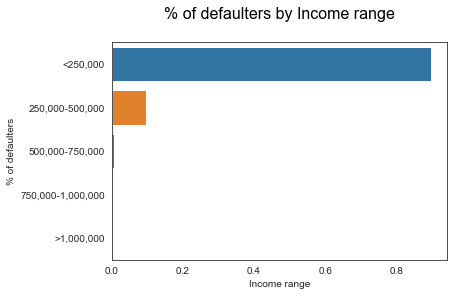

In [193]:
# Analyzing Income range for defaulters

income_def = (defaulters[['INCOME_RANGE','TARGET']].groupby('INCOME_RANGE',as_index=False).sum()).sort_values('TARGET',ascending=False)

income_def.TARGET = income_def.TARGET / income_def.TARGET.sum()

sns.barplot(data=income_def,x='TARGET',y='INCOME_RANGE',order=income_def['INCOME_RANGE'])

plt.ylabel('% of defaulters')

plt.xlabel('Income range')

plt.title('% of defaulters by Income range\n',fontdict={'fontsize':16,'color':'k'})

plt.show()

### Findings
- Over 80% of applicants have an income less than 250,000
- More than 80% of loan defaults are by the people having income less than 250,000

### Findings<a ID="6.2.1.1"></a>
[Table of Contents](#0.1)

- Current Applications Data:
    - <font color=blue> Gender</font>: Majority of the applicants are females with 65.8% applications 
    - <font color=blue> Income type</font>: More than 50% of the applicants are from working class followed by commercial associates and pensioners
    - <font color=blue> Education type</font>: 70% of the applicants have secondary / secondary special education
    - <font color=blue> Family status</font>: Married people the most applicants for the laon with 60% of loans by them
    - <font color=blue> Occupation type</font>: Majority of the loan applicants are laborers with 50% of applications. Least number of applications recieved are from IT an HR staff
    - <font color=blue> Housing type</font>: More than 80% of applicants live in either own house or own apartment
    - <font color=blue> Organization type</font>: People who belongs to Business Entity type 3 are the top 1 applicants for loans
    - <font color=blue> Age Group</font>: More than 25% of applicants belongs to 30-40 age group
    - <font color=blue> Region rating </font>: More than 70% of applicants are from region rating 2
    - <font color=blue> Income range </font>: Over 80% of applicants have an income less than 250,000





- Defaulters:
    - <font color=blue> Gender</font>: Women are majority of the defaluters with defalut rate of more than 50%
    - <font color=blue> Income type</font>: 
        - Of all the income types, Working people are defulting more with a default rate of more than 60%
        - Students have 0% default rate
    - <font color=blue> Education type</font>: More than 80% of defaulters have secondary / secondary special education
    - <font color=blue> Family status</font>: Married people are defaulting the loans at 60% default rate
    - <font color=blue> Occupation type</font>: Laborers are defaluting the loans more than anyone with a 50% default rate
    - <font color=blue> Housing type</font>: - 80% of the defaulters have their own house / apartment
    - <font color=blue> Organization type</font>: Business entity type 3 and self employed people default more.
    - <font color=blue> Age Group</font>: People belonging to 30-40 age group tends to default loans more comparatively
    - <font color=blue> Region rating </font>: Over 70% of defaulters are coming from region rating 2
    - <font color=blue> Income range </font>: More than 80% of loan defaults are by the people having income less than 250,000

    
    
    
    
    
    

## Bivariate Analysis<a ID="6.3"></a>
[Table of Contents](#0.1)

### Numerical - Numerical <a ID="6.3.1"></a>

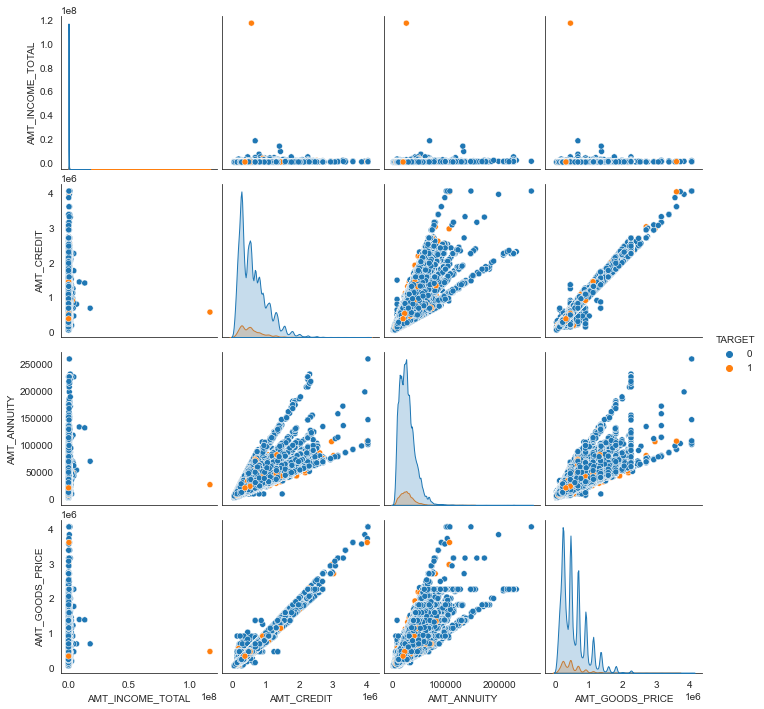

In [100]:
sns.pairplot(data=app,vars=[i for i in app.columns if 'AMT' in i],hue='TARGET')

plt.show()

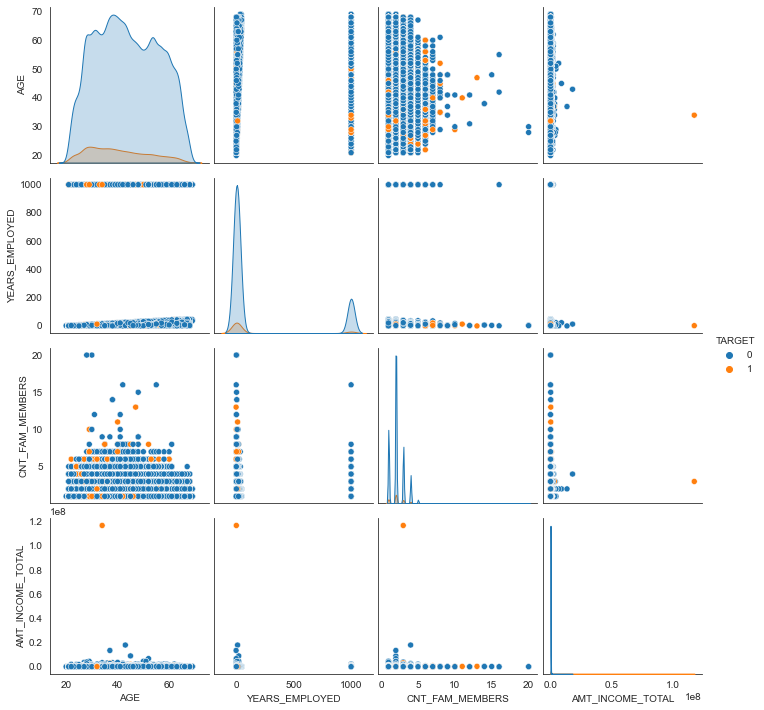

In [101]:
sns.pairplot(data=app,vars=['AGE','YEARS_EMPLOYED','CNT_FAM_MEMBERS','AMT_INCOME_TOTAL'],hue='TARGET')

plt.show()

### Numerical - Categorical <a ID="6.3.3"></a>
[Table of Contents](#0.1)

In [102]:
app.head(2)

SK_ID_CURR  TARGET CONTRACT_TYPE  GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1    Cash loans    Male           No             Yes   
1      100003       0    Cash loans  Female           No              No   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   

  NAME_TYPE_SUITE    INCOME_TYPE                 EDUCATION_TYPE  \
0   Unaccompanied        Working  Secondary / secondary special   
1          Family  State servant               Higher education   

          FAMILY_STATUS       HOUSING_TYPE  AGE  YEARS_EMPLOYED  \
0  Single / not married  House / apartment   25               1   
1               Married  House / apartment   45               3   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH FLAG_MOBIL  FLAG_EMP_PHONE  \
0                 9.0                 5          1               1   
1                 3.0                 0          1               1   

   FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0                 1        Laborers              1.0                    2   
1                 1      Core staff              2.0                    1   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                      10   
1                     MONDAY                      11   

   REG_REGION_NOT_LIVE_REGION LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                           0                       0  Business Entity Type 3   
1                           0                       0                  School   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3  \
0                       2.0                      3.0               1   
1                       0.0                      2.0               1   

  AGE_GROUP     INCOME_RANGE  
0     20-30         <250,000  
1     40-50  250,000-500,000

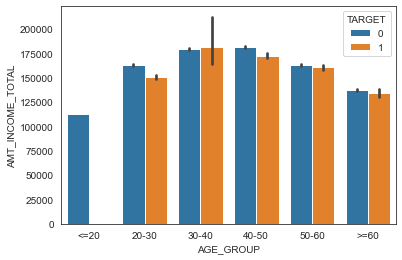

In [103]:
# Analyzing Income of applicants(Defaulters and Non-defaulters) agianst their Age group 

sns.barplot(data=app,y='AMT_INCOME_TOTAL',x='AGE_GROUP',hue='TARGET')

plt.show()

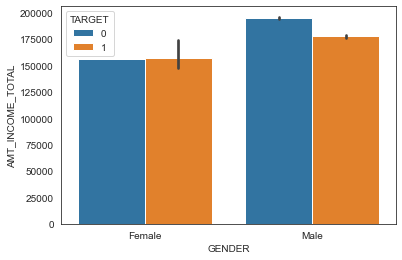

In [104]:
# Analyzing Income of applicants(Defaulters and Non-defaulters) agianst their gender

sns.barplot(data=app,y='AMT_INCOME_TOTAL',x='GENDER',hue='TARGET')

plt.show()

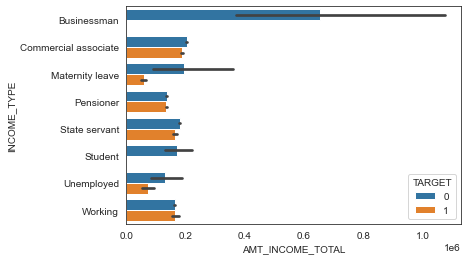

In [105]:
# Analyzing Income of applicants(Defaulters and Non-defaulters) agianst their income type

sns.barplot(data=app,x='AMT_INCOME_TOTAL',y='INCOME_TYPE',hue='TARGET')

plt.show()

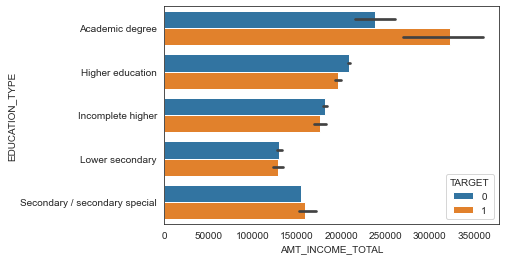

In [106]:
# Analyzing Income of applicants(Defaulters and Non-defaulters) agianst their education type

sns.barplot(data=app,x='AMT_INCOME_TOTAL',y='EDUCATION_TYPE',hue='TARGET')

plt.show()

### Findings <a ID="6.3.1.1">
[Table of Contents](#0.1)
    
- Current Application data:

    - AMT_CREDIT increases with incereasing AMT_GOODS_PRICE i.e, Applicants who are having high value securities or goods will be getting higher loans
    - Applicants of age group 30-40 and 40-50 have the highest income 
    - Men have higher income range than women and men who defalut have higher income than women
    - Business people have higher income range
    - People with Academic education have highest income
    
- Defaluters:
    - People of age group 30-40 and 40 -50 having high income range are defaulting more
    - Defaulters have highest education as academic education 

### 7 Merging and Analyzing DataFrames <a ID="7.0"></a>

[Table of contents](#0.1)

In [107]:
# Merging two DataFrames to get further insights

# using inner join to get data of common ID only

app_final = pd.merge(left= app,right = prev_app,on='SK_ID_CURR',how='inner')

In [108]:
app_final.head()

SK_ID_CURR  TARGET    CONTRACT_TYPE  GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002       1       Cash loans    Male           No             Yes   
1      100003       0       Cash loans  Female           No              No   
2      100003       0       Cash loans  Female           No              No   
3      100003       0       Cash loans  Female           No              No   
4      100004       0  Revolving loans    Male          Yes             Yes   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0          202500.0      406597.5        24700.5   
1             0          270000.0     1293502.5        35698.5   
2             0          270000.0     1293502.5        35698.5   
3             0          270000.0     1293502.5        35698.5   
4             0           67500.0      135000.0         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE    INCOME_TYPE  \
0           351000.0   Unaccompanied        Working   
1          1129500.0          Family  State servant   
2          1129500.0          Family  State servant   
3          1129500.0          Family  State servant   
4           135000.0   Unaccompanied        Working   

                  EDUCATION_TYPE         FAMILY_STATUS       HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH FLAG_MOBIL  \
0   25               1                 9.0                 5          1   
1   45               3                 3.0                 0          1   
2   45               3                 3.0                 0          1   
3   45               3                 3.0                 0          1   
4   52               0                11.0                 6          1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1                 1        Laborers              1.0   
1               1                 1      Core staff              2.0   
2               1                 1      Core staff              2.0   
3               1                 1      Core staff              2.0   
4               1                 1        Laborers              1.0   

  REGION_RATING_CLIENT WEEKDAY_APPR_PROCESS_START_x HOUR_APPR_PROCESS_START_x  \
0                    2                    WEDNESDAY                        10   
1                    1                       MONDAY                        11   
2                    1                       MONDAY                        11   
3                    1                       MONDAY                        11   
4                    2                       MONDAY                         9   

   REG_REGION_NOT_LIVE_REGION LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                           0                       0  Business Entity Type 3   
1                           0                       0                  School   
2                           0                       0                  School   
3                           0                       0                  School   
4                           0                       0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.535276                       1.0   
2      0.622246      0.535276                       1.0   
3      0.622246      0.535276                       1.0   
4      0.555912      0.729567                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  YEARS_LAST_PHONE_CHANGE FLAG_DOCUMENT_3  \
0                       2.0                      3.0

In [109]:
print()
print('Shape of Applications data: ',app.shape)
print()
print('Shape of Previous Applications data: ',prev_app.shape)
print()
print('*'*60)
print()
print('Shape of final merged data: ',app_final.shape)
print()


Shape of Applications data:  (307511, 39)

Shape of Previous Applications data:  (1670214, 22)

************************************************************

Shape of final merged data:  (1413701, 60)



In [110]:
app_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 60 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   CONTRACT_TYPE                 1413701 non-null  category
 3   GENDER                        1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1413701 non-null  category
 12  INCOME_TYPE   

In [111]:
new_cols = []

for i in app_final.columns:
    if i not in app.columns:
        if '_x' not in i:
            new_cols.append(i)

new_cols_type={'column':[],'dtype':[],'firstrow':[]}
for k in new_cols:
    new_cols_type['column'].append(k)
    new_cols_type['dtype'].append(app_final[k].dtype)
    new_cols_type['firstrow'].append(app_final[k][0])
    
new_cols_df = pd.DataFrame(new_cols_type)

new_cols_df

column     dtype         firstrow
0                     SK_ID_PREV     int64          1038818
1             NAME_CONTRACT_TYPE  category   Consumer loans
2                  AMT_ANNUITY_y   float64         9251.775
3                AMT_APPLICATION   float64         179055.0
4                   AMT_CREDIT_y   float64         179055.0
5              AMT_GOODS_PRICE_y   float64         179055.0
6   WEEKDAY_APPR_PROCESS_START_y  category         SATURDAY
7      HOUR_APPR_PROCESS_START_y     int64                9
8    FLAG_LAST_APPL_PER_CONTRACT  category                Y
9         NFLAG_LAST_APPL_IN_DAY     int64                1
10        NAME_CASH_LOAN_PURPOSE  category              XAP
11          NAME_CONTRACT_STATUS  category         Approved
12                 DAYS_DECISION     int64              606
13             NAME_PAYMENT_TYPE  category              XNA
14              NAME_CLIENT_TYPE  category              New
15           NAME_GOODS_CATEGORY  category         Vehicles
16                NAME_PORTFOLIO  category              POS
17             NAME_PRODUCT_TYPE  category              XNA
18                  CHANNEL_TYPE  category            Stone
19          NAME_SELLER_INDUSTRY  category  Auto technology
20                   CNT_PAYMENT   float64             24.0

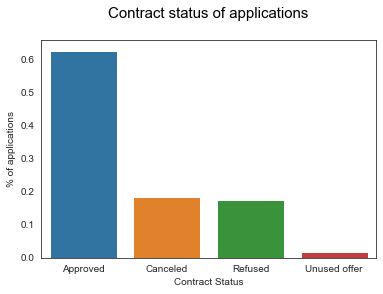

In [112]:
# Analyzing NAME_CONTRACT_STATUS

con_stats = app_final['NAME_CONTRACT_STATUS'].value_counts(normalize=True).reset_index()

sns.barplot(data=con_stats,x='index',y='NAME_CONTRACT_STATUS')

plt.xlabel('Contract Status')

plt.ylabel('% of applications')

plt.title('Contract status of applications\n',fontdict={'fontsize':15,'color':'k'})

plt.show()

In [113]:
app_final['Ones'] = np.ones(app_final.shape[0],dtype='int')

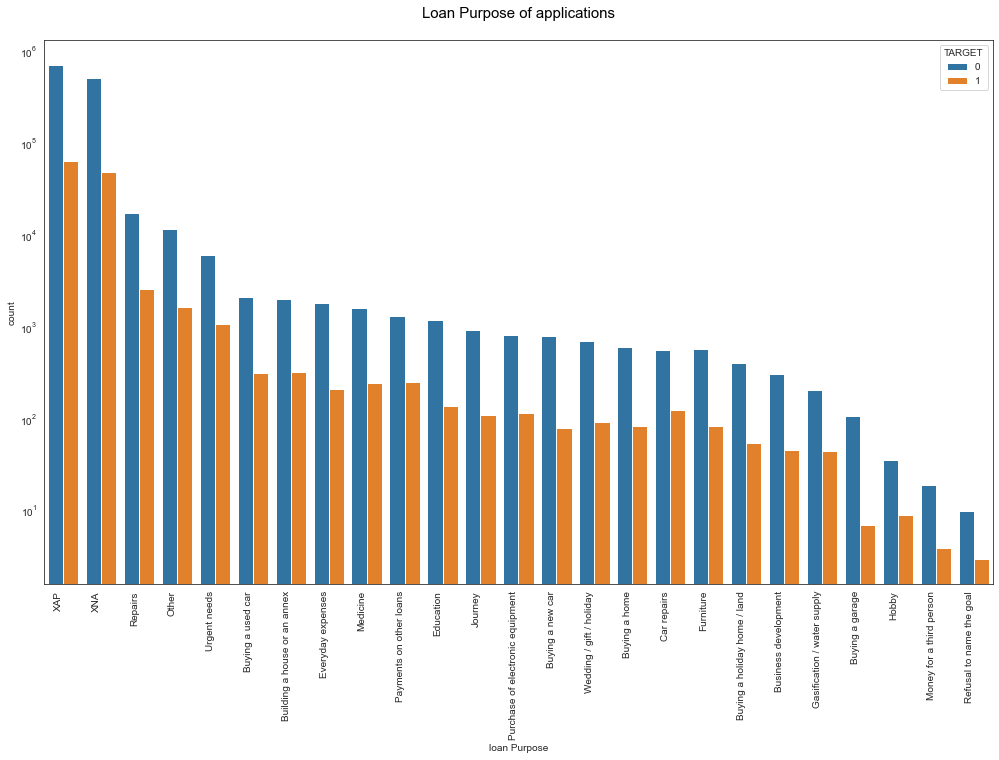

In [151]:
# Analyzing NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=(17,10))

sns.countplot(data=app_final,x='NAME_CASH_LOAN_PURPOSE',order=app_final['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue=app_final['TARGET'])

plt.yscale('log')

plt.xlabel('loan Purpose')

plt.xticks(rotation=90, ha='right')

plt.title('Loan Purpose of applications\n',fontdict={'fontsize':15,'color':'k'})

plt.show()

plt.show()

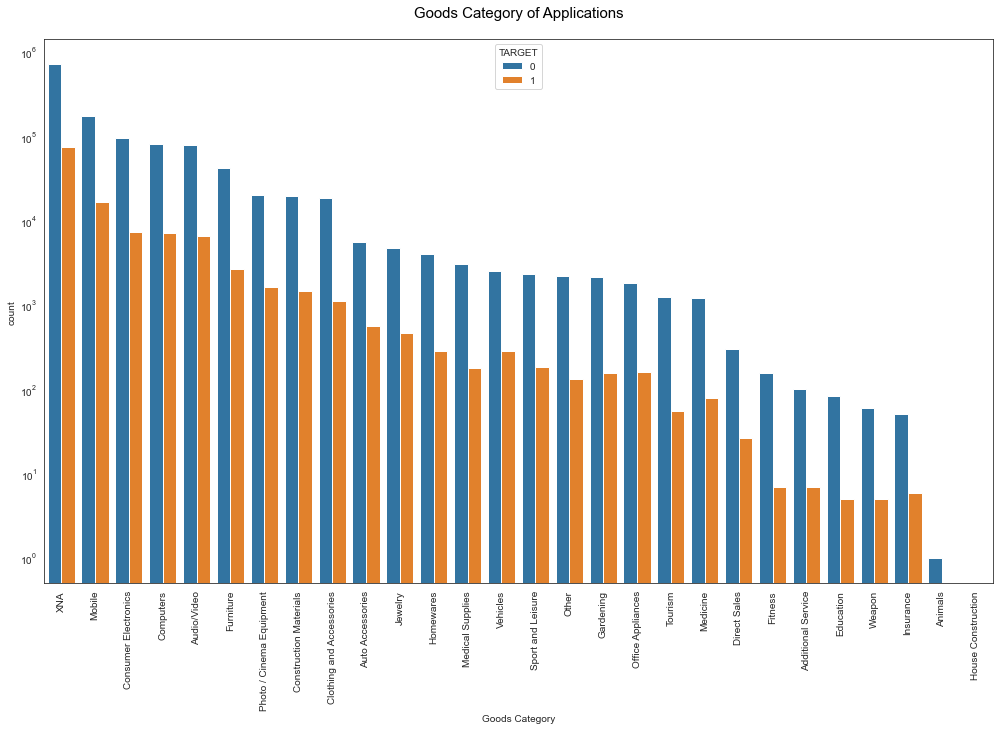

In [152]:
# Anayzing Goods Category

plt.figure(figsize=(17,10))

sns.countplot(x=app_final['NAME_GOODS_CATEGORY'],order=app_final['NAME_GOODS_CATEGORY'].value_counts().index,hue=app_final['TARGET'])

plt.yscale('log')

plt.xticks(rotation=90)

plt.xlabel('Goods Category')

plt.title('Goods Category of Applications\n',fontdict={'fontsize':15,'color':'k'})


plt.show()


### Findings <a ID="7.0.1"></a>
[Table of Contents](#0.1)

- Over 60% of previous applications were approved
- People apply loan for an unkown purpose are defaulting the loans more
- Goods category of unkown and Mobile having more defaulters

In [ ]:
# Checking correlation for final data

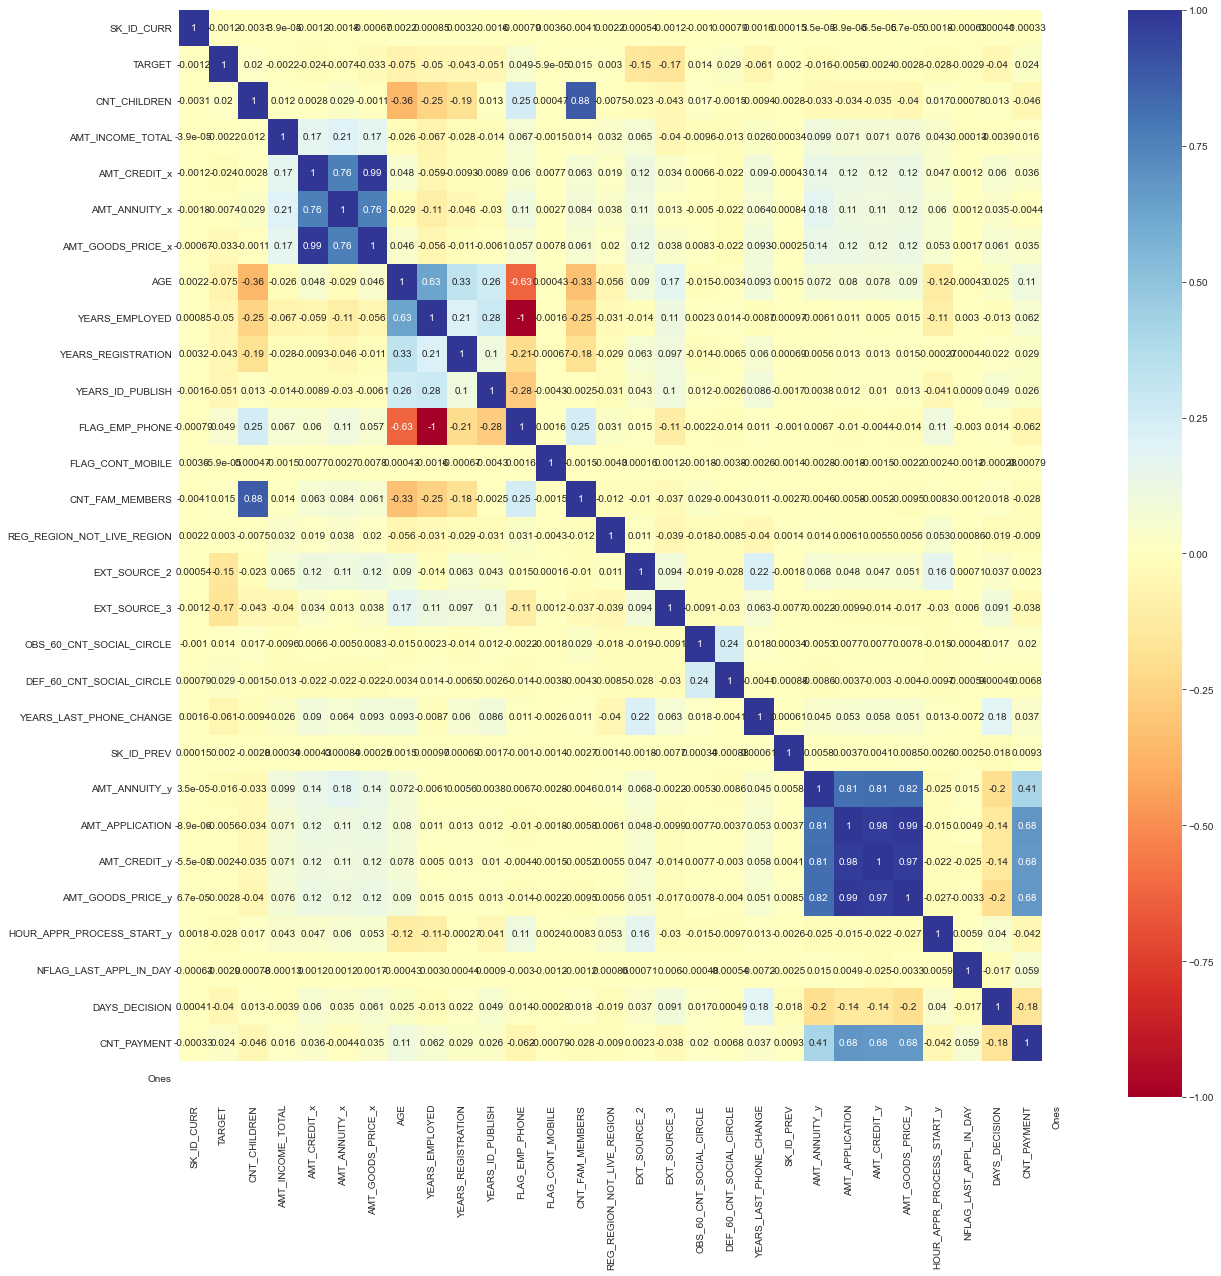

In [160]:
plt.figure(figsize=(20,20))

corr = app_final.corr()

sns.heatmap(corr,cmap='RdYlBu',center=0,vmin=-1,vmax=1,annot=True)

plt.show()

#### All the columns having high correlation were analyzed

### Final Conclusion:

- Defaulters:
    - <font color=blue> Gender</font>: Women are majority of the defaluters with defalut rate of more than 50%
    - <font color=blue> Income type</font>: 
        - Of all the income types, Working people are defulting more with a default rate of more than 60%
        - Students have 0% default rate
    - <font color=blue> Education type</font>: More than 80% of defaulters have secondary / secondary special education
    - <font color=blue> Family status</font>: Married people are defaulting the loans at 60% default rate
    - <font color=blue> Occupation type</font>: Laborers are defaluting the loans more than anyone with a 50% default rate
    - <font color=blue> Housing type</font>: - 80% of the defaulters have their own house / apartment
    - <font color=blue> Organization type</font>: Business entity type 3 and self employed people default more.
    - <font color=blue> Age Group</font>: People belonging to 30-40 age group tends to default loans more comparatively
    - <font color=blue> Region rating </font>: Over 70% of defaulters are coming from region rating 2
    - <font color=blue> Income range </font>: More than 80% of loan defaults are by the people having income less than 250,000
    
- People of age group 30-40 and 40 -50 having high income range are defaulting more
- Defaulters have highest education as academic education 